In [166]:
from readfiles import *
import sys
import numpy.linalg as LA
import copy
from unit import *
from qutip import *
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Writing main Hamiltonian

In [167]:
# Now defining Units and conversion factors. 
h = 6.62607015e-34 # planck's constant in joules second
c = 2.99792458e10 # speed of light in cm per second
e = 1.60217663e-19 # charge of electron in coulombs
hbar = 0.658211951 # in eV-fs or meV-ps or ueV-ns
cm2ev = c*h/e  # conversion factor from 1/cm to eV
cm2mev = cm2ev * 1.e3  # conversion from 1/cm to meV
ev2au = e/4.3597447222071e-18  # converison from eV to atomic mass units
cm2au = cm2ev * ev2au  # conversion from 1/cm to atomic mass units

kB = 8.617333262e-2 # meV/K, Boltzmann constant

In [168]:
free_e_gyro = 28024.9514242E6 # Hz/T gyromagnetic ratio of an electron.
hz2meV = 4.1357E-12 # 1Hz = 4.1357E-15 eV = 4.1357E-12 meV
free_e_gfactor = 2.00231930437378 # free electron g factor 2.00231930437378
alpha = (free_e_gyro*hz2meV)/free_e_gfactor # gyromagnetic ratio/gfactor in meV per tesla
print("alpha in units of meV per tesla = "+str(alpha))
print("hbar is contained in the definition of alpha")

alpha in units of meV per tesla = 0.057884270182028845
hbar is contained in the definition of alpha


In [169]:
eS = jmat(1/2)
eS

(Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
 Qobj data =
 [[0.  0.5]
  [0.5 0. ]],
 Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
 Qobj data =
 [[0.+0.j  0.-0.5j]
  [0.+0.5j 0.+0.j ]],
 Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
 Qobj data =
 [[ 0.5  0. ]
  [ 0.  -0.5]])

In [170]:
sigma_vec = [sigmax(), sigmay(), sigmaz()]
sigma_vec

[Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
 Qobj data =
 [[0. 1.]
  [1. 0.]],
 Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
 Qobj data =
 [[0.+0.j 0.-1.j]
  [0.+1.j 0.+0.j]],
 Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
 Qobj data =
 [[ 1.  0.]
  [ 0. -1.]]]

In [171]:

# NOTE: using the pauli vector instead of spin half operators. Defining a single spin half operators
#eS = jmat(1/2) # list of electronic spin operators [Sx, Sy, Sz] 
# NOTE: In qutip, the eigensolver transforms the Matrix with eigen values in ascending order.

# Loading the gtensor for the basic Hamiltonian.
fname = 'data files/gtensor.dat' # loading the gtensor, hyperfine tensor, and ztensor. 
gtensor, hfc, zfs = read_g(fname)

# Defining External magnetic field vector
Bfield = 1 # Tesla
print("applied magnetic field is ", Bfield, " Tesla")

Bvector = np.zeros(3)
Bvector[0] = 0
Bvector[1] = 0
Bvector[2] = Bfield


# Defining spin Hamiltonian
H = None

# 1) Zeeman interaction
for i in range(3):
    for j in range(3):
        if H is None:
            H = alpha * gtensor[i][j] *(1/2)* sigma_vec[i] * Bvector[j] # notice this 1/2 here. its because i am using pauli matrices 
        else:
            H += alpha * gtensor[i][j] *(1/2)* sigma_vec[i] * Bvector[j]# instead of spin 1/2 matrices 

print('Spin zeeman hamiltonian')
#H.tidyup()
H

applied magnetic field is  1  Tesla
Spin zeeman hamiltonian


Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 0.05882133+0.j         -0.00026763-0.00010135j]
 [-0.00026763+0.00010135j -0.05882133+0.j        ]]

In [172]:
energies, estates  = (-H).eigenstates() # the eigenstates are in acending order, the -ve reintroduces the decending order
energies, estates

(array([-0.05882203,  0.05882203]),
 array([Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
        Qobj data =
        [[-0.99999704+0.j        ]
         [ 0.00227488-0.00086152j]]                                  ,
        Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
        Qobj data =
        [[-0.00243255+0.j       ]
         [-0.93518058+0.3541629j]]                                   ],
       dtype=object))

In [173]:
H = H.transform(estates)
H

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 0.05882203  0.        ]
 [ 0.         -0.05882203]]

### At this point we should tranform the coupings to new eigen basis as well. but since the new basis are very close to the prevous one, I think we can ommitt this step with negligible error

# Loading and visualizing frequencies and gtensor derivative i.e. dgx

In [174]:
# Loading the couplings and frequencies
freq, dgx = get_phonon('data files/spin_phonon.dat')
freq = freq*cm2mev
print("the intra vibrations of a single molecule are the harmonic frequencies here in meV")

number of vibs= 189
the intra vibrations of a single molecule are the harmonic frequencies here in meV


In [175]:
freq/cm2mev

array([  14.99,   26.63,   41.95,   44.71,   45.01,   69.08,   77.9 ,
         82.3 ,   84.32,   84.33,   84.61,  101.2 ,  130.38,  141.75,
        144.73,  156.73,  174.21,  174.3 ,  206.29,  215.14,  215.46,
        219.99,  224.51,  225.5 ,  229.26,  250.26,  251.58,  261.46,
        263.45,  263.47,  267.92,  294.95,  301.79,  304.96,  305.14,
        305.3 ,  310.07,  310.23,  311.78,  330.41,  351.54,  354.5 ,
        366.02,  370.36,  370.4 ,  385.95,  394.24,  396.48,  414.67,
        430.23,  430.61,  430.72,  432.54,  464.63,  464.66,  464.71,
        464.99,  489.35,  504.78,  506.95,  511.84,  540.35,  546.92,
        553.35,  555.66,  558.92,  568.01,  568.06,  602.35,  610.73,
        617.04,  618.77,  648.11,  678.41,  678.42,  678.74,  678.83,
        685.71,  687.25,  716.61,  716.68,  724.27,  727.8 ,  728.27,
        740.71,  741.56,  745.26,  748.9 ,  749.25,  754.42,  754.46,
        755.29,  761.02,  767.03,  814.55,  822.71,  822.82,  822.85,
        822.87,  834

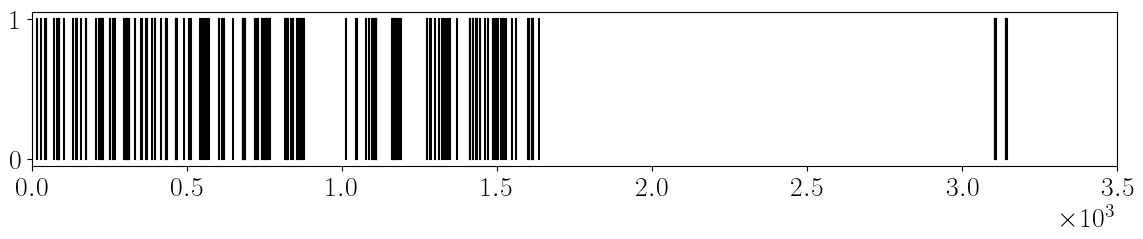

In [176]:
plt.figure(figsize=(14, 2))
plt.xlim([0, 3500])
for i in range(len(freq)):
    plt.plot([freq[i]/cm2mev,freq[i]/cm2mev], [0,1], 'k')
plt.show()

In [177]:
test = np.array([[1,2,3], [4,5,6]])
np.linalg.norm(test)

9.539392014169456

In [178]:
np.sqrt(np.sum(np.array([[1,2,3], [4,5,6]])**2))

9.539392014169456

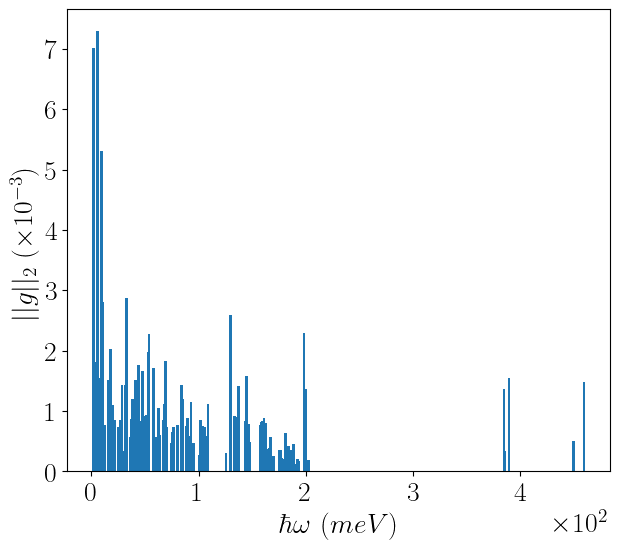

In [179]:
zeeman_l2_norm = []

for k in range(len(freq)):
    zeeman_l2_norm.append(np.linalg.norm(dgx[k,:]))

plt.rcParams['text.usetex'] = True 
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(7, 6))
plt.bar(freq, np.array(zeeman_l2_norm)*1e3, width = 2.5)
#plt.title(r"Zeeman coupling $l_2$ norm $V = \sum_{ij} |\frac{\partial g_{ij}}{\partial x}\delta x|^2$")
plt.xlabel('$\hbar \omega \ (meV)$ ')
plt.ylabel(r'$||g||_2 \ (\times 10^{-3})$')
plt.show()

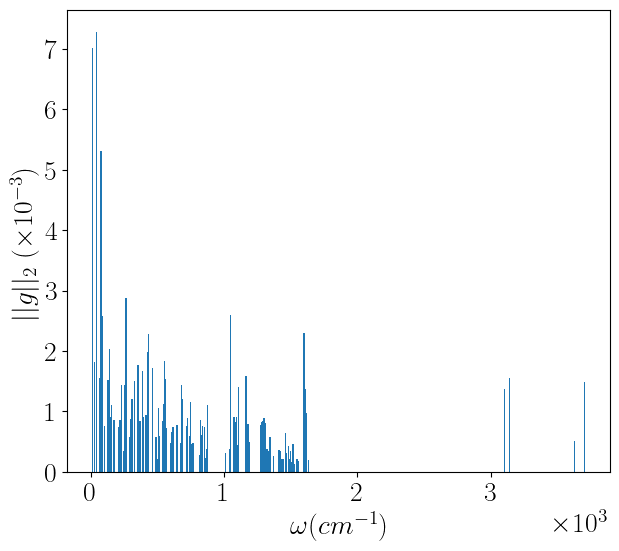

In [180]:
zeeman_l2_norm = []

for k in range(len(freq)):
    zeeman_l2_norm.append(np.linalg.norm(dgx[k,:]))

plt.rcParams['text.usetex'] = True 
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(7, 6))
plt.bar(freq/cm2mev, np.array(zeeman_l2_norm)*1e3, width = 10)
#plt.title(r"Zeeman coupling $l_2$ norm $V = \sum_{ij} |\frac{\partial g_{ij}}{\partial x}\delta x|^2$")
plt.xlabel('$ \omega (cm^{-1})$ ')
plt.ylabel(r'$||g||_2 \ (\times 10^{-3})$')
plt.show()

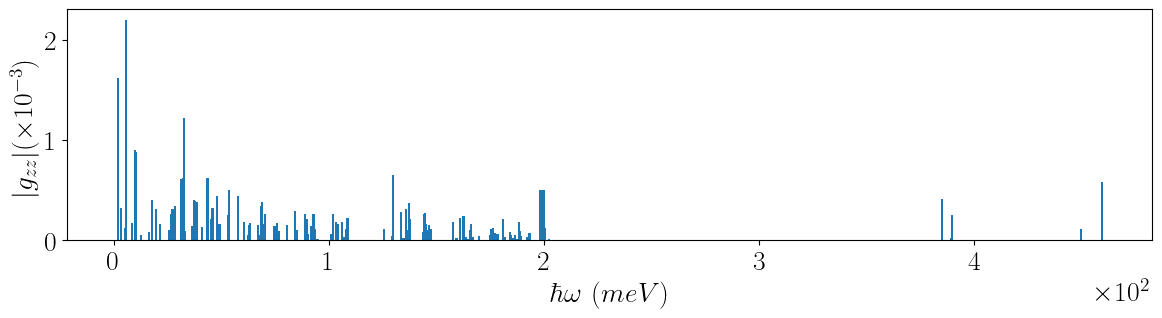

In [181]:
plt.rcParams['text.usetex'] = True 
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(14, 3))
plt.bar(freq, np.abs(np.array(dgx[:,2,2])*1e3), width = 1)
plt.xlabel('$\hbar \omega \ (meV)$ ')
plt.ylabel(r'$|g_{zz}|  (\times 10^{-3})$')
plt.show()

### Converting derivatives of gtensor into couplings $\tilde c$ with Pauli matrices

$$
gcoupS= \tilde c_{\alpha k} = \alpha \frac{\partial g_{\alpha z}}{\partial q_k} B_z (1/2)
$$

Note: this last 1/2 is comming from converting spin half opertors (S) to pauli matrices

In [182]:
Np = len(freq)
gcoupS = np.zeros((Np, 3),dtype=float) # defining a place holder for couplings
for k in range(Np):
    for j in range(3):
        gcoupS[k,:] += alpha * dgx[k,:,j] * Bvector[j] * (1/2) # only thing missing from here is Pauli matrix. Everything else is contained.
        #therefore, couplings will have units of energy as meV

# NOTE: this coupling also has the harmonic bath displacement operator contained in it. therefore, it has units of meV.
print('First 5 new couplings \n', gcoupS[:5])
print('these couplings are for the Pauli X, Y, Z operators.')

First 5 new couplings 
 [[-2.21567256e-05 -1.48493256e-06  4.67052432e-05]
 [-1.22759322e-05  6.18407121e-06  9.42011739e-06]
 [-1.98852137e-05 -5.73895246e-06 -3.48108707e-06]
 [-2.28141601e-05  1.85489331e-05  6.33866505e-05]
 [-4.05866732e-07  1.76832836e-06  3.06667130e-05]]
these couplings are for the Pauli X, Y, Z operators.


# Understanding of the couplings.

$$
H_{int} = \sum_i A_i \otimes C_i = \sum_i \sigma_i C_i
$$

where $A_i$ are system operators i.e. $\sigma_i$ Pauli matrices, and $C_i$ are linear sum of phonon displacement operators. 
i.e. 
$$
C_i = \sum_j c^{(i)}_j u_j
$$

In the case of Zeeman Hamiltonian, the spin-phonon interaction is consequence of variation in g-tensor as a result of atomic displacements due to molecular vibrations. Therefore, 
$$
H_{int} = \sum_i \sigma_i [\frac{\alpha}{2}\sum_{jk} \frac{\partial g_{ik}}{\partial u_j} B_k u_j] = \sum_i \sigma_i (\sum_{j}c^i_j u_j) =\sum_i \sigma_i C_i
$$
where $B_k$ are elements of magnetic field vector, $g^j$ is the g-tensor, $\alpha$ contains gyromagnetic ratio and acts like a conversion factor for the entire term to energy (meV/T). Finally 
$$
c^i_j = \frac{\alpha}{2} \sum_{k} \frac{\partial g_{ik}}{\partial u_j} B_k 
$$

### NOW instead of $\frac{\partial g_{ik}}{\partial u_j}$, we have $\frac{\partial g_{ik}}{\partial u_j}\Delta u_j = dgx$

so one way forward is to assume: 
$$
c^i_j u_j = \frac{\alpha}{2} \sum_{k} \frac{\partial g_{ik}}{\partial u_j}\Delta u_j B_k \frac{u_j}{\Delta u_j} = \frac{\alpha}{2} \sum_{k} dgx B_k \frac{u_j}{\Delta u_j} = \frac{\alpha}{2} \sum_{k} dgx B_k \frac{u_j}{\Delta u_j} = gcoup \frac{u_j}{\Delta u_j}
$$

Now this means that there is this puzzle of what the value for $\Delta u_j$ happens to be; can I take it as some normalization factor?

### Defining spectral densities

In [183]:
def shape_normal(w, w0, sigma):
    '''
    this function returns a Gaussian/Normal distribution centered at w0 with std sigma
    '''
    return np.exp(-0.5*((w-w0)/sigma)**2)/(sigma*np.sqrt(2*np.pi))


def lorentzian(w, w0, sigma):
    '''
    this function returns a lorentzian profile centered at 'w0' with thickness 'sigma'
    NOTE: sigma is related to the lifetime of the mode by tau = hbar/sigma
    '''
    return  sigma/(np.pi*(sigma**2 + (w-w0)**2))

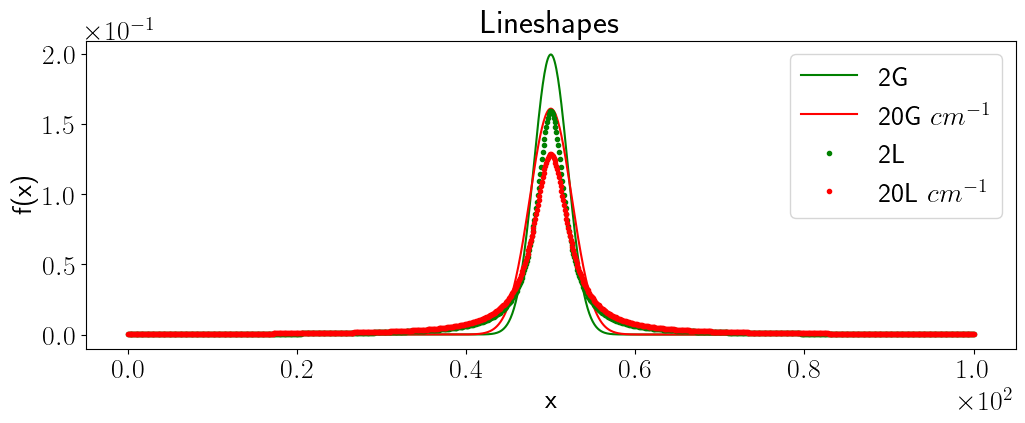

In [184]:
# lets test it out. 
x = np.linspace(0, 100, 1000)
y1 = [shape_normal(w, w0=50, sigma=1) for w in x]
y2 = [shape_normal(w, w0=50, sigma=2) for w in x]
y20cm = [shape_normal(w, w0=50, sigma=20*cm2mev) for w in x]

y1l = [lorentzian(w, w0=50, sigma=1) for w in x]
y2l = [lorentzian(w, w0=50, sigma=2) for w in x]
y20cml = [lorentzian(w, w0=50, sigma=20*cm2mev) for w in x]



plt.figure(figsize=(12,4))
#plt.plot(x,y1, 'b')
plt.plot(x,y2, 'g')
plt.plot(x,y20cm, 'r')
#plt.plot(x,y1l, 'b.-')
plt.plot(x,y2l,'g.')
plt.plot(x,y20cml,'r.')
plt.title("Lineshapes")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend(['2G','20G $cm^{-1}$','2L','20L $cm^{-1}$'])
plt.show()

In [186]:
def spectral_density_quantum(w, freqs, coup, T=5, sigma=2, shape='L'):
    '''
    for full formula see the cell below
    n = n_thermal = pop of harmonic oscillator mode with frequency ‘w’, at the temperature described by ‘w_th’ where 𝜔_th = 𝑘𝐵 𝑇/ℏ
    NOTE: freqs and couplings must be passed in energy units i.e. meV. 
    units of S(w) are [(meV)^2 s]

    Note: It requires cij tilde converts it into cij by division with sqrt(hbar/2wj) and then computes the spectral density
    '''
    kB = 8.6173e-2 # meV/K, Boltzmann constant
    w_th = kB*T/hbar # temperature defined as frequency
    S = 0
    for j in range(len(freqs)):
        wj = freqs[j]/hbar
        cj = coup[j]/np.sqrt(hbar/(2*wj)) # energy / length
        nj = n_thermal(wj,w_th)
        #sigma = 0.1*wj
        if shape=='G':
            S += np.pi*hbar*(cj**2/wj)*( (nj+1)*shape_normal(w, wj, sigma) + nj*shape_normal(w, -wj, sigma) )
        else:
            S += np.pi*hbar*(cj**2/wj)*( (nj+1)*lorentzian(w, wj, sigma) + nj*lorentzian(w, -wj, sigma) )
    return S

def spectral_density_classical(w, freqs, coup, T=5, sigma=2, shape='L'):
    '''
    for full formula see the cell below
    Units of S(w) are energy (meV) if freqs and couplings are in frequency units.
    '''
    kB = 8.6173e-2 # meV/K, Boltzmann constant
    S = 0
    for j in range(len(freqs)):
        wj = freqs[j]/hbar
        cj = coup[j]/np.sqrt(hbar/(2*wj)) # energy/length
        if shape=='G':
            S += np.pi*kB*T*(cj**2/wj**2)*(shape_normal(w, wj, sigma) + shape_normal(w, -wj, sigma))
        else:
            S += np.pi*kB*T*(cj**2/wj**2)*(lorentzian(w, wj, sigma) + lorentzian(w, -wj, sigma))
    return S

NOTE: The quantum spectral density follows the equation 
Starting from the time domain description: 
$$
S(t) = \sum_j \frac{\hbar c_j^2}{2\omega_j} [(n_j +1)e^{-i\omega_j t} + n_j e^{i\omega_j t}]
$$
we transform to the fourier domain using definition
$$
2\pi \delta(\omega\pm \omega_j) = \int_{-\infty}^{-\infty} e^{ i (\omega \pm \omega_j) t} dt
$$
$$
S(\omega) = \pi \hbar \sum_j \frac{c_j^2}{\omega_j} [(n_j+1) \delta(\omega - \omega_j)+n_j\delta(\omega+\omega_j)  ]
$$
where $n(\omega_j)$ and the delta shapes will be replaced by the Gaussian
$$
S(\omega) = \pi \hbar \sum_j \frac{c_j^2}{\omega_j} [(n_j+1) G(\omega_j, \sigma)+n_jG(-\omega_j, \sigma)  ]
$$

in the high temperature limit $n_j = \frac{k_B T}{\hbar \omega_j} >> 1$. This leads to 
$$
S(\omega) = \pi k_B T \sum_j \frac{c_j^2}{\omega_j^2} [G(\omega_j, \sigma) + G(-\omega_j, \sigma)  ]
$$

which is the same as classical spectral density. NOTE: time domain classical funciton is 
$$
S(t) = k_B T \sum_j \frac{c_j^2}{\omega_j^2} cos(\omega_j t)
$$



### Implementation detail. 
From the dimensional analysis fo the generic interaciton Hamiltonian
$$
H_{int} = \sum_{ij} c_{ij} (\sigma_i \otimes \hat{X}_j)
$$
$c$'s must be in $energy/[X]$ untis. Using definition $X_j = \sqrt{\frac{\hbar}{2\omega_j}}(a^\dagger_j + a_j)$

our couplings will have to be re formed as $c_{new} = c \times (\frac{\hbar}{2\omega_j})^{-1/2}$

new units of couplings are $[c_{new}] = \frac{\sqrt{eng}}{s}$. 

Consequently, $[S(\omega)] = eng^2 s$ and $ [S(\omega)/\hbar^2] = 1/s$

In [187]:
Np = len(freq)
gcoupS = np.zeros((Np, 3),dtype=float) # defining a place holder for couplings
for k in range(Np):
    for j in range(3):
        gcoupS[k,:] += alpha * dgx[k,:,j] * Bvector[j] * (1/2) # only thing missing from here is Pauli matrix. Everything else is contained.
        #therefore, couplings will have units of energy as meV

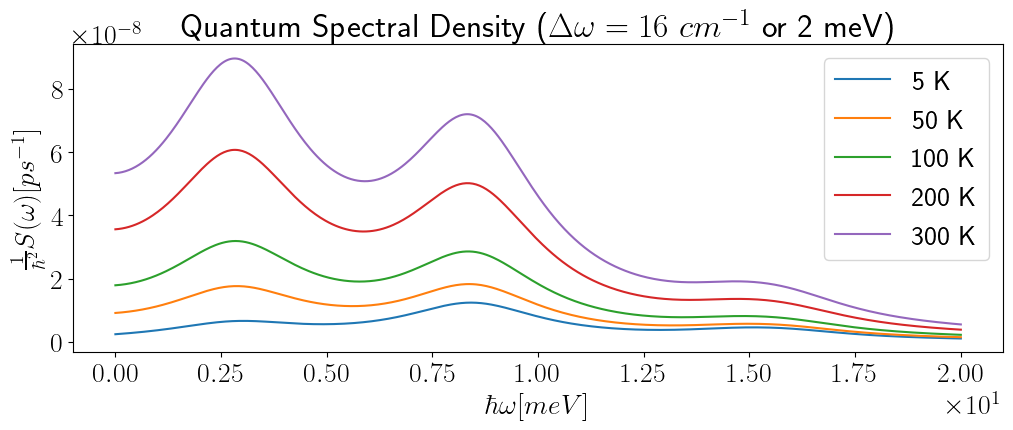

In [188]:
x = np.linspace(0, 20, 500)
y5q = [spectral_density_quantum(w, freqs=freq, coup=gcoupS[:,2], T=5, sigma=2)/hbar**2 for w in x]
y50q = [spectral_density_quantum(w, freqs=freq, coup=gcoupS[:,2], T=50, sigma=2)/hbar**2 for w in x]
y100q = [spectral_density_quantum(w, freqs=freq, coup=gcoupS[:,2], T=100, sigma=2)/hbar**2 for w in x]
y200q = [spectral_density_quantum(w, freqs=freq, coup=gcoupS[:,2], T=200, sigma=2)/hbar**2 for w in x]
y300q = [spectral_density_quantum(w, freqs=freq, coup=gcoupS[:,2], T=300, sigma=2)/hbar**2 for w in x]
plt.figure(figsize=(12,4))
plt.plot(x,y5q)
plt.plot(x,y50q)
plt.plot(x,y100q)
plt.plot(x,y200q)
plt.plot(x,y300q)
plt.title(r"Quantum Spectral Density ($\Delta \omega = 16 \ cm^{-1}$ or 2 meV) ")
plt.xlabel(r"$\hbar \omega [meV]$")
plt.ylabel(r"$\frac{1}{\hbar^2}S(\omega) [ps^{-1}]$")
plt.legend(['5 K','50 K','100 K', '200 K', '300 K'])
plt.show()

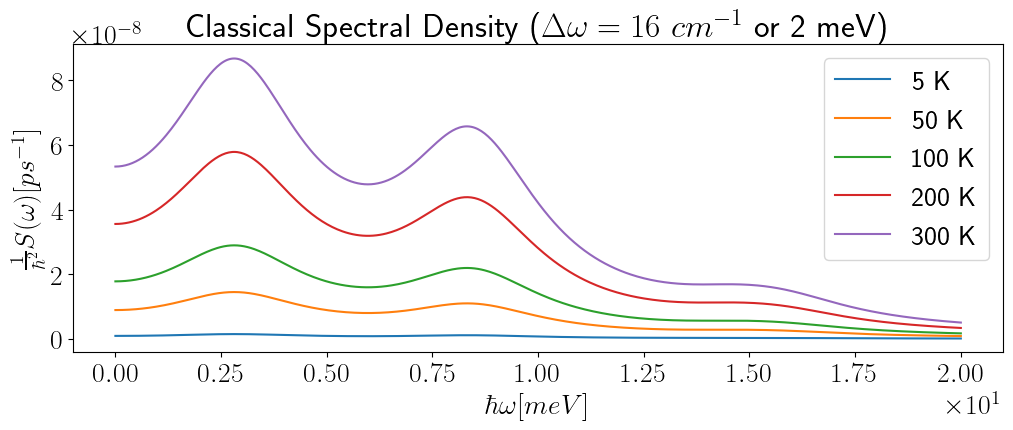

In [189]:
x = np.linspace(0, 20, 500)
y5c = [spectral_density_classical(w, freqs=freq, coup=gcoupS[:,2], T=5, sigma=2)/hbar**2 for w in x]
y50c = [spectral_density_classical(w, freqs=freq, coup=gcoupS[:,2], T=50, sigma=2)/hbar**2 for w in x]
y100c = [spectral_density_classical(w, freqs=freq, coup=gcoupS[:,2], T=100, sigma=2)/hbar**2 for w in x]
y200c = [spectral_density_classical(w, freqs=freq, coup=gcoupS[:,2], T=200, sigma=2)/hbar**2 for w in x]
y300c = [spectral_density_classical(w, freqs=freq, coup=gcoupS[:,2], T=300, sigma=2)/hbar**2 for w in x]

plt.figure(figsize=(12,4))
plt.plot(x,y5c)
plt.plot(x,y50c)
plt.plot(x,y100c)
plt.plot(x,y200c)
plt.plot(x,y300c)
plt.title(r"Classical Spectral Density ($\Delta \omega = 16 \ cm^{-1}$ or 2 meV) ")
plt.xlabel(r"$\hbar \omega [meV]$")
plt.ylabel(r"$\frac{1}{\hbar^2}S(\omega) [ps^{-1}]$")
plt.legend(['5 K','50 K','100 K', '200 K', '300 K'])
plt.show()

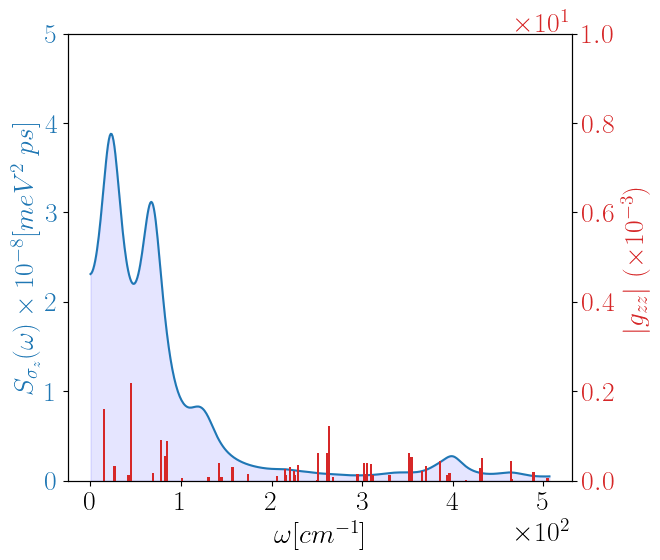

In [190]:
highfreq = 59

xspec = np.linspace(0, freq[highfreq], 500)
yspec = [spectral_density_quantum(w, freqs=freq, coup=gcoupS[:,2], T=300, sigma=2) for w in xspec]

fig, ax1 = plt.subplots(figsize=(7,6))

color = 'tab:blue'
ax1.set_xlabel(r"$\omega [cm^{-1}]$")
ax1.set_ylabel(r"$S_{\sigma_z}(\omega)\times 10^{-8} [meV^2 \ ps]$", color=color)
ax1.set_ylim([0, 5])
ax1.plot(xspec/cm2mev,np.array(yspec)*1e8,color=color)
ax1.fill_between(xspec/cm2mev, np.array(yspec)*1e8, 0, color='blue', alpha=.1)
ax1.tick_params(axis='y', labelcolor=color)


gnorm = np.array([np.sqrt(dgx[i,2,2]**2) for i in range(len(freq[:highfreq]))])


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel(r"$|g_{zz}| \ (\times 10^{-3})$", color=color)  # we already handled the x-label with ax1
#ax2.set_yscale('log')
ax2.bar(freq[:highfreq]/cm2mev, gnorm*1e3, width=2.5, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim([0, 10])

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

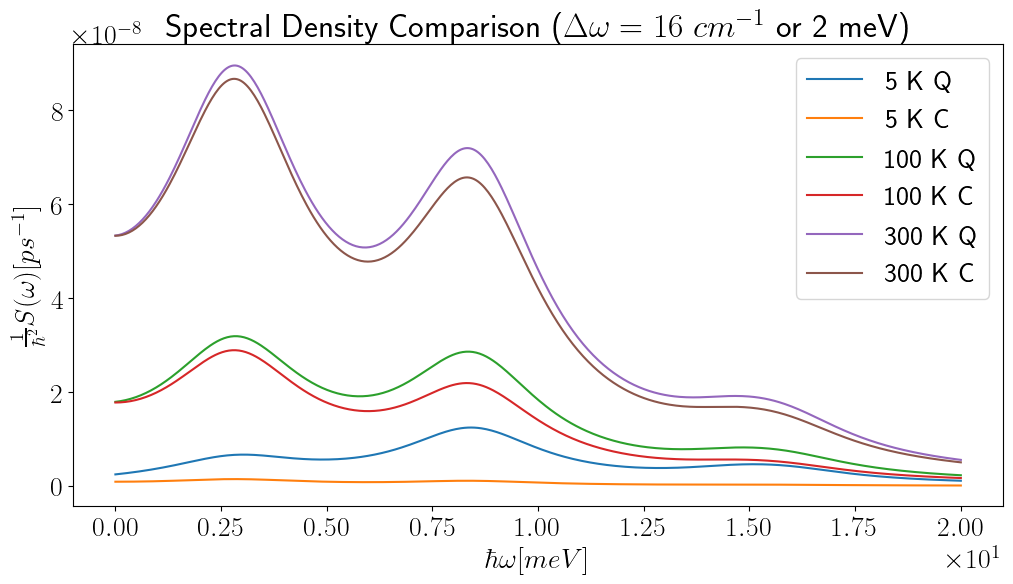

In [191]:
plt.figure(figsize=(12,6))
plt.plot(x,y5q)
plt.plot(x,y5c)
plt.plot(x,y100q)
plt.plot(x,y100c)
plt.plot(x,y300q)
plt.plot(x,y300c)
plt.title(r"Spectral Density Comparison ($\Delta \omega = 16 \ cm^{-1}$ or 2 meV) ")
plt.xlabel(r"$\hbar \omega [meV]$")
plt.ylabel(r"$\frac{1}{\hbar^2}S(\omega) [ps^{-1}]$")

plt.legend(['5 K Q','5 K C','100 K Q', '100 K C', '300 K Q', '300 K C'])
plt.show()

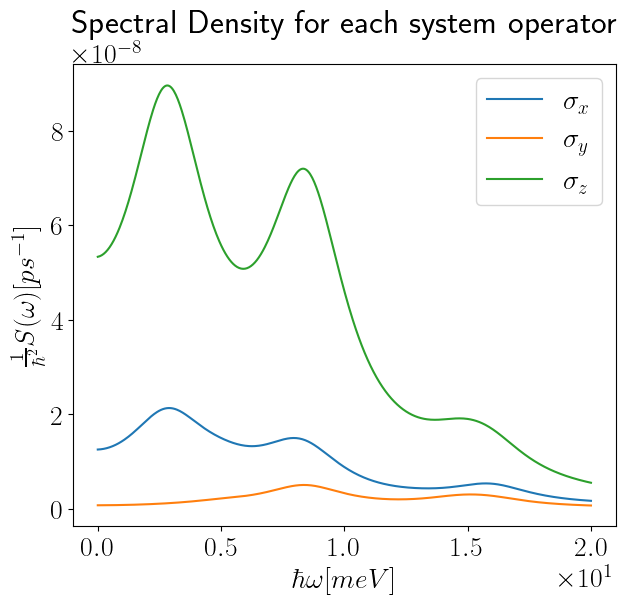

In [192]:
x = np.linspace(0, 20, 500)
yx = [spectral_density_quantum(w, freqs=freq, coup=gcoupS[:,0], T=300, sigma=2)/hbar**2 for w in x]
yy = [spectral_density_quantum(w, freqs=freq, coup=gcoupS[:,1], T=300, sigma=2)/hbar**2 for w in x]
yz = [spectral_density_quantum(w, freqs=freq, coup=gcoupS[:,2], T=300, sigma=2)/hbar**2 for w in x]

plt.figure(figsize=(7,6))
plt.plot(x,yx)
plt.plot(x,yy)
plt.plot(x,yz)
plt.title(r"Spectral Density for each system operator ")
plt.xlabel(r"$\hbar \omega [meV]$")
plt.ylabel(r"$\frac{1}{\hbar^2}S(\omega) [ps^{-1}]$")
plt.legend([r"$\sigma_x$", r"$\sigma_y$", r"$\sigma_z$"])
plt.show()

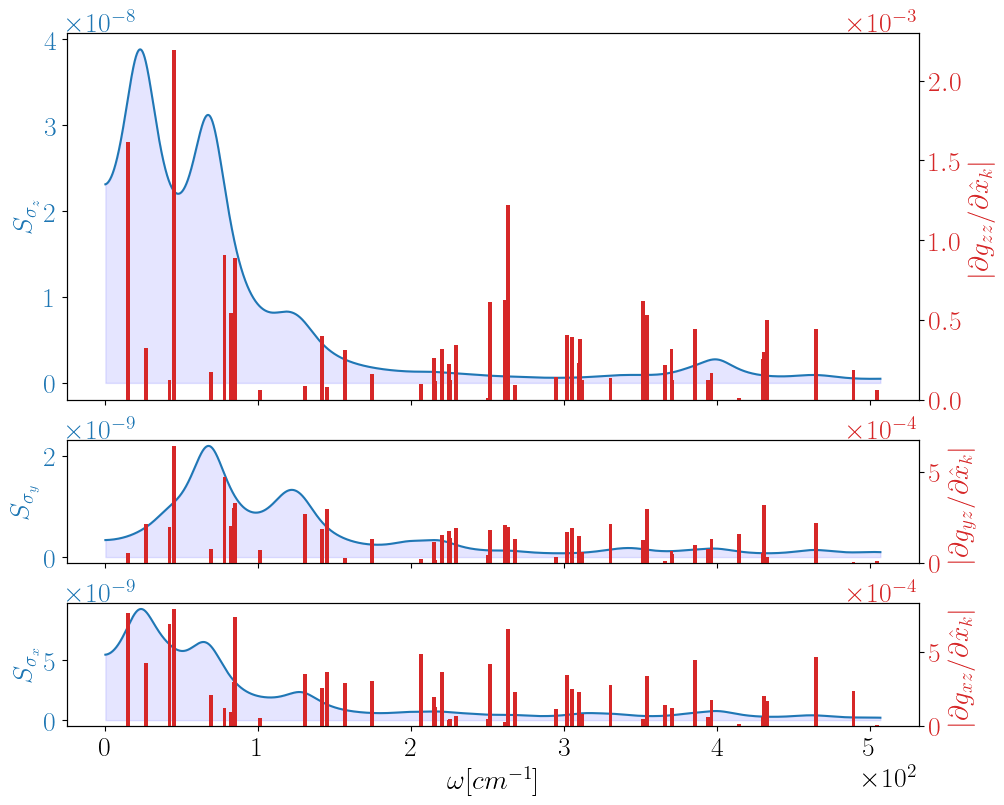

In [193]:
plt.rcParams['text.usetex'] = True 
plt.rcParams["axes.formatter.limits"]=(0,0)
plt.rcParams.update({'font.size': 20})

#fig, axs = plt.subplots(3, sharex=True)
fig, axs = plt.subplots(3,1,figsize=(11,9),sharex=True, gridspec_kw={'height_ratios': [3, 1,1]})
#fig = plt.figure(figsize=(7, 9))
#gs = fig.add_gridspec(3, hspace=0)
#axs = gs.subplots(sharex=True, sharey=False)

highfreq = 59

xspec = np.linspace(0, freq[highfreq], 5000)
yspec = [spectral_density_quantum(w, freqs=freq, coup=gcoupS[:,2], T=300, sigma=2) for w in xspec]
color = 'tab:blue'
axs[0].set_xlabel(r"$\omega [cm^{-1}]$")
axs[0].set_ylabel(r"$S_{\sigma_z}$", color=color)
#axs[0].set_ylim([0, 5])
axs[0].plot(xspec/cm2mev,np.array(yspec),color=color)
axs[0].fill_between(xspec/cm2mev, np.array(yspec), 0, color='blue', alpha=.1)
axs[0].tick_params(axis='y', labelcolor=color)

ax2 = axs[0].twinx()  # instantiate a second axes that shares the same x-axis
gnorm = np.array([np.sqrt(dgx[i,2,2]**2) for i in range(len(freq[:highfreq]))])

color = 'tab:red'
ax2.set_ylabel(r"$|\partial g_{zz}/\partial \hat x_k|$", color=color)  # we already handled the x-label with ax1
#ax2.set_yscale('log')
ax2.bar(freq[:highfreq]/cm2mev, gnorm, width=2.5, color=color)
ax2.tick_params(axis='y', labelcolor=color)
#ax2.set_ylim([0, 10])


#############

yspec = [spectral_density_quantum(w, freqs=freq, coup=gcoupS[:,1], T=300, sigma=2) for w in xspec]
color = 'tab:blue'
axs[1].set_xlabel(r"$\omega [cm^{-1}]$")
axs[1].set_ylabel(r"$S_{\sigma_y} $", color=color)
#axs[1].set_ylim([0, 5])
axs[1].plot(xspec/cm2mev,np.array(yspec),color=color)
axs[1].fill_between(xspec/cm2mev, np.array(yspec), 0, color='blue', alpha=.1)
axs[1].tick_params(axis='y', labelcolor=color)

ax2 = axs[1].twinx()  # instantiate a second axes that shares the same x-axis
gnorm = np.array([np.sqrt(dgx[i,1,2]**2) for i in range(len(freq[:highfreq]))])

color = 'tab:red'
ax2.set_ylabel(r"$|\partial g_{yz}/\partial \hat x_k|$", color=color)  # we already handled the x-label with ax1
#ax2.set_yscale('log')
ax2.bar(freq[:highfreq]/cm2mev, gnorm, width=2.5, color=color)
ax2.tick_params(axis='y', labelcolor=color)
#ax2.set_ylim([0, 10])


#############

yspec = [spectral_density_quantum(w, freqs=freq, coup=gcoupS[:,0], T=300, sigma=2) for w in xspec]
color = 'tab:blue'
axs[2].set_xlabel(r"$\omega [cm^{-1}]$")
axs[2].set_ylabel(r"$S_{\sigma_x}$", color=color)
#axs[2].set_ylim([0, 5])
axs[2].plot(xspec/cm2mev,np.array(yspec),color=color)
axs[2].fill_between(xspec/cm2mev, np.array(yspec), 0, color='blue', alpha=.1)
axs[2].tick_params(axis='y', labelcolor=color)

ax2 = axs[2].twinx()  # instantiate a second axes that shares the same x-axis
gnorm = np.array([np.sqrt(dgx[i,0,2]**2) for i in range(len(freq[:highfreq]))])

color = 'tab:red'
ax2.set_ylabel(r"$|\partial g_{xz}/\partial \hat x_k|$", color=color)  # we already handled the x-label with ax1
#ax2.set_yscale('log')
ax2.bar(freq[:highfreq]/cm2mev, gnorm, width=2.5, color=color)
ax2.tick_params(axis='y', labelcolor=color)
#ax2.set_ylim([0, 10])


# Hide x labels and tick labels for all but bottom plot.
for ax in axs:
    ax.label_outer()

## At this point it is important to note that the useful values of w at which we need S are w=0 and w=energy split

In [194]:
w_split = energies[1]- energies[0]
print(r"hbar*w_split= ", w_split, " meV, ","w_split/hbar= ", w_split/hbar, " freq")

hbar*w_split=  0.11764405164669092  meV,  w_split/hbar=  0.17873277971929583  freq


# Redfield with full set of modes for T1 and T2

## T1 Dynamics

10.0%. Run time:   0.14s. Est. time left: 00:00:00:01
20.0%. Run time:   0.30s. Est. time left: 00:00:00:01
30.0%. Run time:   0.48s. Est. time left: 00:00:00:01
40.0%. Run time:   0.63s. Est. time left: 00:00:00:00
50.0%. Run time:   0.79s. Est. time left: 00:00:00:00
60.0%. Run time:   0.94s. Est. time left: 00:00:00:00
70.0%. Run time:   1.09s. Est. time left: 00:00:00:00
80.0%. Run time:   1.24s. Est. time left: 00:00:00:00
90.0%. Run time:   1.39s. Est. time left: 00:00:00:00
Total run time:   1.54s


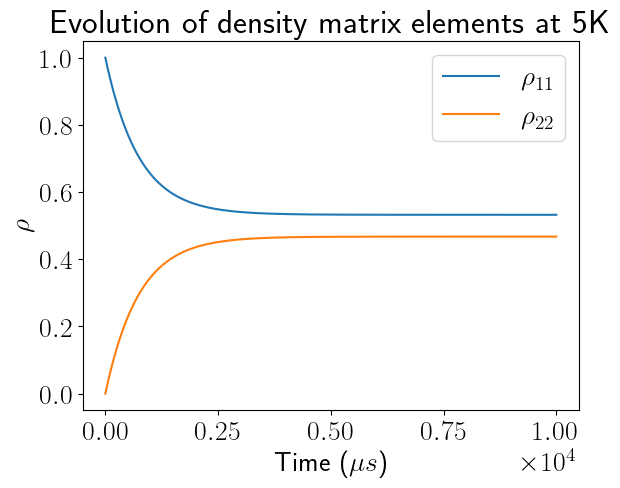

In [201]:
# Single Run
Temp = 5

tlist = np.linspace(1, 10000e6, 2000) # in ps

specDensityX = lambda w : spectral_density_quantum(w, freqs=freq, coup=gcoupS[:,0], T=Temp, sigma=2, shape='L')/hbar**2
specDensityY = lambda w : spectral_density_quantum(w, freqs=freq, coup=gcoupS[:,1], T=Temp, sigma=2, shape='L')/hbar**2
specDensityZ = lambda w : spectral_density_quantum(w, freqs=freq, coup=gcoupS[:,2], T=Temp, sigma=2, shape='L')/hbar**2

e_ops = []

aops = [[sigmax(),specDensityX], [sigmay(),specDensityY], [sigmaz(),specDensityZ]]


rho0 = basis(2,0)*basis(2,0).dag()
results1 = brmesolve(-H/(hbar), rho0, tlist, a_ops=aops, e_ops=e_ops, progress_bar=True)

rho11_vals = np.array([results1.states[k].full()[0,0] for k in range(len(tlist))])
rho22_vals = np.array([results1.states[k].full()[1,1] for k in range(len(tlist))])

plt.figure()
plt.plot(tlist/1e6, np.abs(rho11_vals))
plt.plot(tlist/1e6, np.abs(rho22_vals))
plt.xlabel(r"Time ($\mu s$)")
plt.ylabel(r"$\rho$")
plt.title("Evolution of density matrix elements at "+str(Temp)+"K")
plt.legend([r"$\rho_{11}$", r"$\rho_{22}$"])
plt.show()

In [203]:
kB = 8.617333262e-2 # meV/K, Boltzmann constant
w_th = kB*Temp/hbar # temperature defined as frequency
nth = n_thermal(energies[1]/hbar,w_th)
thermal_rho_11 = thermal_dm(2, nth, method='operator').full()[0].real[0]
thermal_rho_11

0.5340771527930755

In [204]:
# curve fitting to extract T1.
def t1_func_thermal(x,t1):
    kB = 8.6173e-2 # meV/K, Boltzmann constant
    w_th = kB*Temp/hbar # temperature defined as frequency
    nth = n_thermal(energies[1]/hbar,w_th)
    thermal_rho_11 = thermal_dm(2, nth, method='operator').full()[0].real[0]
    return (1-thermal_rho_11)*np.exp(-x/t1)+thermal_rho_11

def t1_func(x,t1, xinf):
    return (1-xinf)*np.exp(-x/t1)+xinf
    
def t1_func_classical(x,t1):
    return (1/2)*np.exp(-x/t1) + (1/2)

In [214]:
fthermal, df = curve_fit(t1_func_thermal, tlist/1e6, np.abs(rho11_vals))
fclassical, df = curve_fit(t1_func_classical, tlist/1e6, np.abs(rho11_vals))
f, df = curve_fit(t1_func, tlist/1e6, np.abs(rho11_vals))
f

array([7.43411177e+02, 5.32440588e-01])

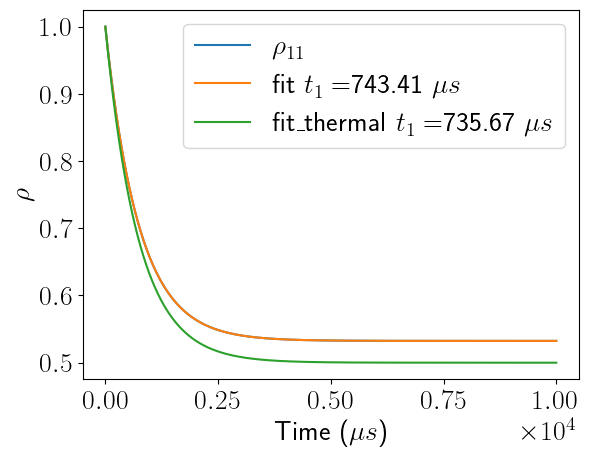

In [216]:
fit_thermal = np.array([t1_func_classical(k, fthermal)  for k in tlist/1e6])
fit_classical = np.array([t1_func_classical(k, fclassical)  for k in tlist/1e6])
fit_f = np.array([t1_func(k, f[0],f[1])  for k in tlist/1e6])
plt.figure()
plt.plot(tlist/1e6, np.abs(rho11_vals))
plt.plot(tlist/1e6, fit_f)
plt.plot(tlist/1e6, fit_thermal)
plt.xlabel(r"Time ($\mu s$)")
plt.ylabel(r"$\rho$")
#plt.title("Evolution of densitymatrix elements at "+str(Temp)+"K, T1 = "+str(f))
plt.legend([r"$\rho_{11}$", r"fit $t_1 = $"+str(np.round(f,2)[0])+r"$\ \mu s$", r"fit_thermal $t_1 = $"+str(np.round(fthermal,2)[0])+r"$\ \mu s$"])
plt.show()

### Now checking the respose of T1 from 5K to 300 K

In [218]:
# Temperature Scan, multiple runs
Temp_list = [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320]
tlist = np.linspace(1, 10000e6, 2000) # in ps

In [ ]:
# QUANTUM

t1_list = np.array([])
t1d_list = np.array([])

rho0 = basis(2,0)*basis(2,0).dag()
e_ops = []
rho_list = []

for k in range(len(Temp_list)):
    temp = Temp_list[k]
    print(temp)
    specDensityX = lambda w : spectral_density_quantum(w, freqs=freq, coup=gcoupS[:,0], T=temp, sigma=2, shape='L')/hbar**2
    specDensityY = lambda w : spectral_density_quantum(w, freqs=freq, coup=gcoupS[:,1], T=temp, sigma=2, shape='L')/hbar**2
    specDensityZ = lambda w : spectral_density_quantum(w, freqs=freq, coup=gcoupS[:,2], T=temp, sigma=2, shape='L')/hbar**2
    aops = [[sigmax(),specDensityX], [sigmay(),specDensityY], [sigmaz(),specDensityZ]]
    
    results_k = brmesolve(H/(hbar), rho0, tlist, a_ops=aops, e_ops=e_ops)
    rho_list.append(results_k.states) # saving states for later
    rho11_k = np.array([results_k.states[j].full()[0,0] for j in range(len(tlist))]) # first element of rho vs time 


    fthermal, df = curve_fit(t1_func_thermal, tlist/1e6, np.abs(rho11_k))
    fclassical, df = curve_fit(t1_func_classical, tlist/1e6, np.abs(rho11_k))
    f, df = curve_fit(t1_func, tlist/1e6, np.abs(rho11_k))
    print('saturation value difference', f[1]-rho11_k[-1])
    t1, t1d = f[0], df[0,0]
    t1_list = np.append(t1_list, t1)
    t1d_list = np.append(t1d_list, t1d)
    ##########################################################################################################################
    ################## PLOTTING ################################################
    #fit_thermal = np.array([t1_func_classical(m, fthermal)  for m in tlist/1e6])
    #fit_classical = np.array([t1_func_classical(m, fclassical)  for m in tlist/1e6])
    fit_f = np.array([t1_func(m, f[0],f[1])  for m in tlist/1e6])
    plt.figure()
    plt.plot(tlist/1e6, np.abs(rho11_k))
    plt.plot(tlist/1e6, fit_f)
    #plt.plot(tlist/1e6, fit_thermal)
    plt.xlabel(r"Time ($\mu s$)")
    plt.ylabel(r"$\rho$")
    plt.legend([r"$\rho_{11}$", r"fit $t_1 = $"+str(np.round(f,2)[0])+r"$\ \mu s$", r"fit_thermal $t_1 = $"+str(np.round(fthermal,2)[0])+r"$\ \mu s$"])
    plt.show()
    ############################################################################################################################
np.save('saved variables/t1_list', t1_list)
np.save('saved variables/t1d_list', t1d_list)
print(t1_list) 

In [ ]:
# CLASSICAL

t1_list = np.array([])
t1d_list = np.array([])

rho0 = basis(2,0)*basis(2,0).dag()
e_ops = []
rho_list = []

for k in range(len(Temp_list)):
    temp = Temp_list[k]
    print(temp)
    specDensityX = lambda w : spectral_density_classical(w, freqs=freq, coup=gcoupS[:,0], T=temp, sigma=2, shape='L')/hbar**2
    specDensityY = lambda w : spectral_density_classical(w, freqs=freq, coup=gcoupS[:,1], T=temp, sigma=2, shape='L')/hbar**2
    specDensityZ = lambda w : spectral_density_classical(w, freqs=freq, coup=gcoupS[:,2], T=temp, sigma=2, shape='L')/hbar**2
    aops = [[sigmax(),specDensityX], [sigmay(),specDensityY], [sigmaz(),specDensityZ]]
    
    results_k = brmesolve(H/(hbar), rho0, tlist, a_ops=aops, e_ops=e_ops)
    rho_list.append(results_k.states) # saving states for later
    rho11_k = np.array([results_k.states[j].full()[0,0] for j in range(len(tlist))]) # first element of rho vs time 


    #f, df = curve_fit(t1_func_thermal, tlist/1e6, np.abs(rho11_k))
    f, df = curve_fit(t1_func_classical, tlist/1e6, np.abs(rho11_k))
    #f, df = curve_fit(t1_func, tlist/1e6, np.abs(rho11_k))
    #t1, t1d = f[0], df[0,0]
    t1, t1d = f, df
    t1_list = np.append(t1_list, t1)
    t1d_list = np.append(t1d_list, t1d)
    ##########################################################################################################################
    ################## PLOTTING ################################################
    #fit = np.array([t1_func_classical(m, t1)  for m in tlist/1e6])
    fit = np.array([t1_func_classical(m, t1)  for m in tlist/1e6])
    #fit = np.array([t1_func(m, f[0],f[1])  for m in tlist/1e6])
    plt.figure()
    plt.plot(tlist/1e6, np.abs(rho11_k))
    plt.plot(tlist/1e6, fit)
    plt.xlabel(r"Time ($\mu s$)")
    plt.ylabel(r"$\rho$")
    plt.legend([r"$\rho_{11}$", r"fit $t_1 = $"+str(np.round(t1,2)[0])+r"$\ \mu s$"])
    plt.show()
    ############################################################################################################################
np.save('saved variables/t1_list_classical', t1_list)
np.save('saved variables/t1d_list_classical', t1d_list)
print(t1_list) 

Text(0, 0.5, '$T_1 [\\mu s]$')

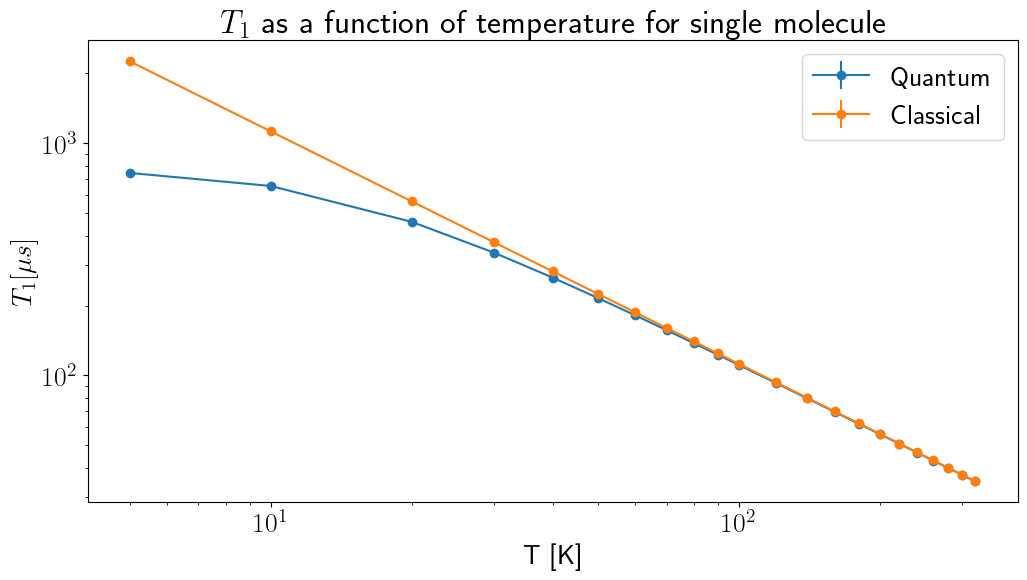

In [229]:
t1_list_quantum = np.load('saved variables/t1_list.npy')
t1d_list_quantum = np.load('saved variables/t1d_list.npy')
t1_list_classical = np.load('saved variables/t1_list_classical.npy')
t1d_list_classical = np.load('saved variables/t1d_list_classical.npy')
plt.figure(figsize=(12,6))
plt.errorbar(Temp_list, t1_list_quantum, yerr = t1d_list_quantum, fmt='-o')
plt.errorbar(Temp_list, t1_list_classical, yerr = t1d_list_classical, fmt='-o')
plt.xscale('log')
plt.yscale('log')
plt.title(r"$T_1$ as a function of temperature for single molecule")
plt.legend(['Quantum ', 'Classical'])
plt.xlabel('T [K]')
plt.ylabel(r"$T_1 [\mu s]$")


In [231]:
# testing t1 dynamics at 0.345 T
# Defining External magnetic field vector

B345 = np.zeros(3)
B345[0] = 0
B345[1] = 0
B345[2] = 0.345

# Defining spin Hamiltonian
H345 = None

# 1) Zeeman interaction
for i in range(3):
    for j in range(3):
        if H345 is None:
            H345 = alpha * gtensor[i][j] *(1/2)* sigma_vec[i] * B345[j] # notice this 1/2 here. its because i am using pauli matrices 
        else:
            H345 += alpha * gtensor[i][j] *(1/2)* sigma_vec[i] * B345[j]# instead of spin 1/2 matrices 

H345

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 2.02933587e-02+0.00000000e+00j -9.23306350e-05-3.49665997e-05j]
 [-9.23306350e-05+3.49665997e-05j -2.02933587e-02+0.00000000e+00j]]

In [234]:
# QUANTUM

t1_list_345mT6 = np.array([])
t1d_list_345mT6 = np.array([])

rho0 = basis(2,0)*basis(2,0).dag()
e_ops = []
rho_list = []
options=Options()
options.nsteps=5000

for k in range(len(Temp_list)):
    temp = Temp_list[k]
    print(temp)
    specDensityX = lambda w : spectral_density_quantum(w, freqs=freq, coup=gcoupS[:,0]*0.345, T=temp, sigma=2)/hbar**2
    specDensityY = lambda w : spectral_density_quantum(w, freqs=freq, coup=gcoupS[:,1]*0.345, T=temp, sigma=2)/hbar**2
    specDensityZ = lambda w : spectral_density_quantum(w, freqs=freq, coup=gcoupS[:,2]*0.345, T=temp, sigma=2)/hbar**2
    aops = [[sigmax(),specDensityX], [sigmay(),specDensityY], [sigmaz(),specDensityZ]]
    
    results_k = brmesolve(H345/(hbar), rho0, tlist, a_ops=aops, e_ops=e_ops)
    rho_list.append(results_k.states) # saving states for later
    rho11_k = np.array([results_k.states[j].full()[0,0] for j in range(len(tlist))]) # first element of rho vs time 
    

    #f, df = curve_fit(t1_func_thermal, tlist/1e6, np.abs(rho11_k))
    #f, df = curve_fit(t1_func_classical, tlist/1e6, np.abs(rho11_k))
    f, df = curve_fit(t1_func, tlist/1e6, np.abs(rho11_k))
    print('saturation value difference', f[1]-rho11_k[-1])
    t1, t1d = f[0], df[0,0]
    t1_list_345mT6 = np.append(t1_list_345mT6, t1)
    t1d_list_345mT6 = np.append(t1d_list_345mT6, t1d)
    ##########################################################################################################################
    ################## PLOTTING ################################################
    #fit_thermal = np.array([t1_func_classical(m, fthermal)  for m in tlist/1e6])
    #fit_classical = np.array([t1_func_classical(m, fclassical)  for m in tlist/1e6])
    fit_f = np.array([t1_func(m, f[0],f[1])  for m in tlist/1e6])
    plt.figure()
    plt.plot(tlist/1e6, np.abs(rho11_k))
    plt.plot(tlist/1e6, fit_f)
    #plt.plot(tlist/1e6, fit_thermal)
    plt.xlabel(r"Time ($\mu s$)")
    plt.ylabel(r"$\rho$")
    plt.legend([r"$\rho_{11}$", r"fit $t_1 = $"+str(np.round(f,2)[0])+r"$\ \mu s$", r"fit_thermal $t_1 = $"+str(np.round(fthermal,2)[0])+r"$\ \mu s$"])
    plt.show()
    ############################################################################################################################
np.save('saved variables/t1_list_345mT', t1_list_345mT)
np.save('saved variables/t1d_list_345mT', t1d_list_345mT)
print(t1_list_345mT6)  

5


Exception: ODE integration error: Try to increase the allowed number of substeps by increasing the nsteps parameter in the Options class.

In [50]:
# testing t1 dynamics at 0.345 T

t1_list_345mT6 = np.array([])
t1d_list_345mT6 = np.array([])

rho0 = basis(2,0)*basis(2,0).dag()
e_ops = []
rho_list = []
options=Options()
options.nsteps=5000
for k in range(len(Temp_list)):
    temp = Temp_list[k]
    specDensityX = lambda w : spectral_density_quantum(w, freqs=freq, coup=gcoupS[:,0]*0.345, T=temp, sigma=6)/hbar**2
    specDensityY = lambda w : spectral_density_quantum(w, freqs=freq, coup=gcoupS[:,1]*0.345, T=temp, sigma=6)/hbar**2
    specDensityZ = lambda w : spectral_density_quantum(w, freqs=freq, coup=gcoupS[:,2]*0.345, T=temp, sigma=6)/hbar**2
    aops = [[sigmax(),specDensityX], [sigmay(),specDensityY], [sigmaz(),specDensityZ]]
    print("temperature ", temp)
    results_k = brmesolve(H345/(hbar), rho0, tlist, a_ops=aops, e_ops=e_ops)
    rho_list.append(results_k.states) # saving states for later
    rho11_k = np.array([results_k.states[j].full()[0,0] for j in range(len(tlist))]) # first element of rho vs time 
    t1, t1d = curve_fit(t1_func, tlist/1e6, np.abs(rho11_k))
    t1_list_345mT6 = np.append(t1_list_345mT6, t1)
    t1d_list_345mT6 = np.append(t1d_list_345mT6, t1d)


#np.save('t1_list_345mT', t1_list_345mT)
#np.save('t1d_list_345mT', t1d_list_345mT)
print(t1_list_345mT6)  

temperature  5
temperature  10
temperature  20
temperature  30
temperature  40
temperature  50
temperature  60
temperature  70
temperature  80
temperature  90
temperature  100
temperature  120
temperature  140
temperature  160
temperature  180
temperature  200
temperature  220
temperature  240
temperature  260
temperature  280
temperature  300
temperature  320


NameError: name 't1_list_345mT2' is not defined

Text(0, 0.5, '$T_1 [\\mu s]$')

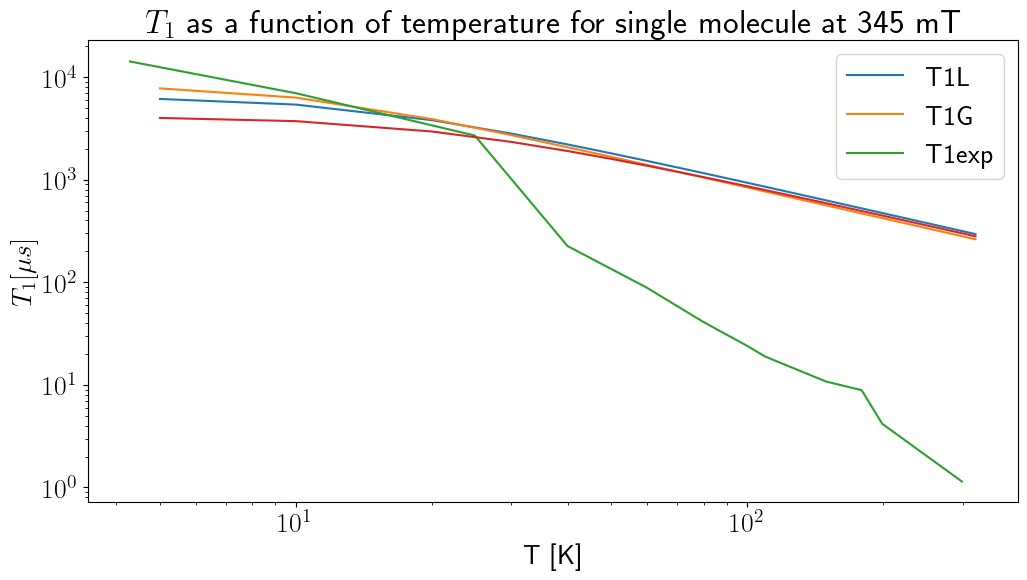

In [51]:
t1exp = np.array([14163.72734, 6951.95423, 2691.61351,225.3970881,89.17022735,41.0253116,23.92805806,18.87486711,10.77391862,
                  8.873229094,4.171377424,1.143754573])
t2exp = np.array([2.709966603,3.084314127,3.362185823,3.290454844,3.018511437,2.829407455,2.540192367,2.330255261,2.047428917,
                  1.798929603,1.449961246, 0.84569149])
temp_exp = np.array([4.292624643, 9.998683733, 24.90051857, 39.95789327, 59.68654518, 79.87897033, 99.98683733, 109.4868393, 
                     149.3539422, 179.0832077, 198.9289628, 298.5702735])

t1_list_345mT_G = np.load('t1_list_345mT.npy')
t1d_list_345mT_G = np.load('t1d_list_345mT.npy')

plt.figure(figsize=(12,6))
plt.plot(Temp_list, t1_list_345mT)#, yerr = t1d_list_345mT, fmt='-o')
plt.plot(Temp_list, t1_list_345mT_G)#, yerr = t1d_list_345mT_G, fmt='-o')
plt.plot(temp_exp, t1exp)
plt.plot(Temp_list, t1_list_345mT6)
plt.xscale('log')
plt.yscale('log')
plt.title(r"$T_1$ as a function of temperature for single molecule at 345 mT")
plt.legend(['T1L', 'T1G', 'T1exp'])
plt.xlabel('T [K]')
plt.ylabel(r"$T_1 [\mu s]$")

## T2 Dynamics

In [50]:
tlist_t2 = np.linspace(1, 3e6, 10000) # in ps
rho0 = basis(2,0)*basis(2,1).dag()
rho0

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[0. 1.]
 [0. 0.]]

In [51]:
tlist_t2 = np.linspace(1, 3e6, 10000) # in ps
rho0 = basis(2,0)*basis(2,1).dag()

e_ops = []
specDensityX = lambda w : spectral_density_quantum(w, freqs=freq/hbar, coup=gcoupS[:,0]/hbar, T=Temp, sigma=2)
specDensityY = lambda w : spectral_density_quantum(w, freqs=freq/hbar, coup=gcoupS[:,1]/hbar, T=Temp, sigma=2)
specDensityZ = lambda w : spectral_density_quantum(w, freqs=freq/hbar, coup=gcoupS[:,2]/hbar, T=Temp, sigma=2)
aops = [[sigmax(),specDensityX], [sigmay(),specDensityY], [sigmaz(),specDensityZ]]
    
results_k = brmesolve(H/(hbar), rho0, tlist_t2, a_ops=aops, e_ops=e_ops, progress_bar=True)

rho12 = np.array([results_k.states[j].full()[0,1] for j in range(len(tlist_t2))]) # 12 element of rho vs time 

10.0%. Run time:   1.75s. Est. time left: 00:00:00:15
20.0%. Run time:   3.49s. Est. time left: 00:00:00:13
30.0%. Run time:   5.28s. Est. time left: 00:00:00:12
40.0%. Run time:   7.03s. Est. time left: 00:00:00:10
50.0%. Run time:   8.78s. Est. time left: 00:00:00:08
60.0%. Run time:  10.53s. Est. time left: 00:00:00:07
70.0%. Run time:  12.27s. Est. time left: 00:00:00:05
80.0%. Run time:  14.02s. Est. time left: 00:00:00:03
90.0%. Run time:  15.77s. Est. time left: 00:00:00:01
Total run time:  17.53s


In [17]:
def t2_func(x,t2):
    return np.exp(-x/t2)


In [ ]:
t2, t2d = curve_fit(t2_func, tlist_t2/1e6, np.abs(rho12))
t2

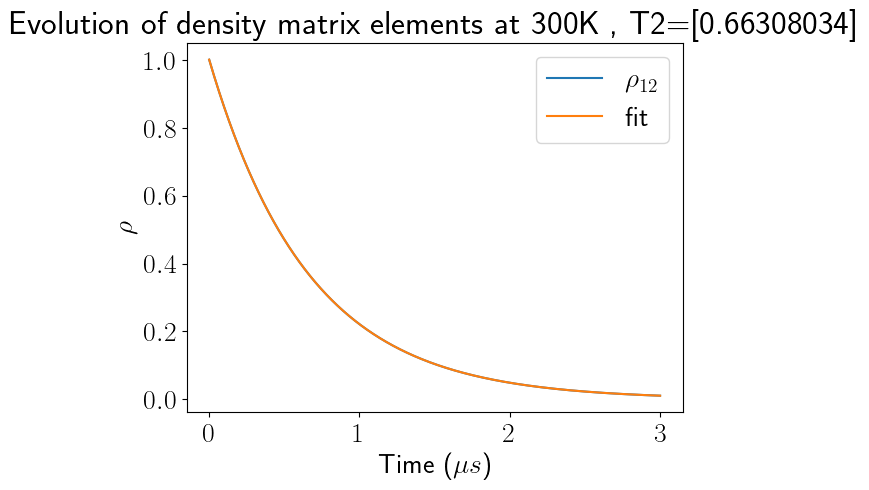

In [53]:

fit = np.array([t2_func(k,t2)  for k in tlist_t2/1e6])

plt.figure()
plt.plot(tlist_t2/1e6, np.abs(rho12))
plt.plot(tlist_t2/1e6, fit)
plt.xlabel(r"Time ($\mu s$)")
plt.ylabel(r"$\rho$")
plt.title("Evolution of density matrix elements at "+str(Temp)+"K , T2="+str(t2))
plt.legend([r"$\rho_{12}$", r"fit"])
plt.show()

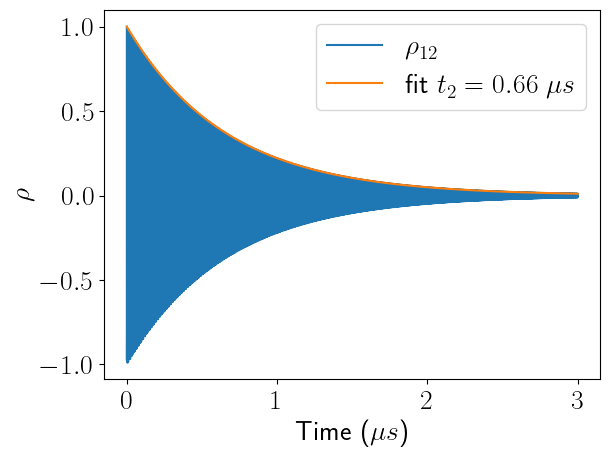

In [54]:
fit = np.array([t2_func(k,t2)  for k in tlist_t2/1e6])

plt.figure()
plt.plot(tlist_t2/1e6, np.real(rho12))
plt.plot(tlist_t2/1e6, fit)
plt.xlabel(r"Time ($\mu s$)")
plt.ylabel(r"$\rho$")
#plt.title("Evolution of density matrix elements at "+str(Temp)+"K , T2="+str(np.round(t2,3)))
plt.legend([r"$\rho_{12}$", r"fit $t_2 = 0.66\ \mu s$"])
plt.show()

calculating t2 for  5  K
calculating t2 for  10  K
calculating t2 for  20  K
calculating t2 for  30  K
calculating t2 for  40  K
calculating t2 for  50  K
calculating t2 for  60  K
calculating t2 for  70  K
calculating t2 for  80  K
calculating t2 for  90  K
calculating t2 for  100  K
calculating t2 for  120  K
calculating t2 for  140  K
calculating t2 for  160  K
calculating t2 for  180  K
calculating t2 for  200  K
calculating t2 for  220  K
calculating t2 for  240  K
calculating t2 for  260  K
calculating t2 for  280  K
calculating t2 for  300  K
calculating t2 for  320  K
[0.67389112 0.67384299 0.67358713 0.67325302 0.67289476 0.67252586
 0.6721519  0.67177496 0.67139662 0.67101723 0.67063796 0.66987788
 0.66911758 0.66835849 0.66760064 0.66684346 0.66608795 0.665334
 0.66458118 0.66383042 0.66308034 0.66233301]


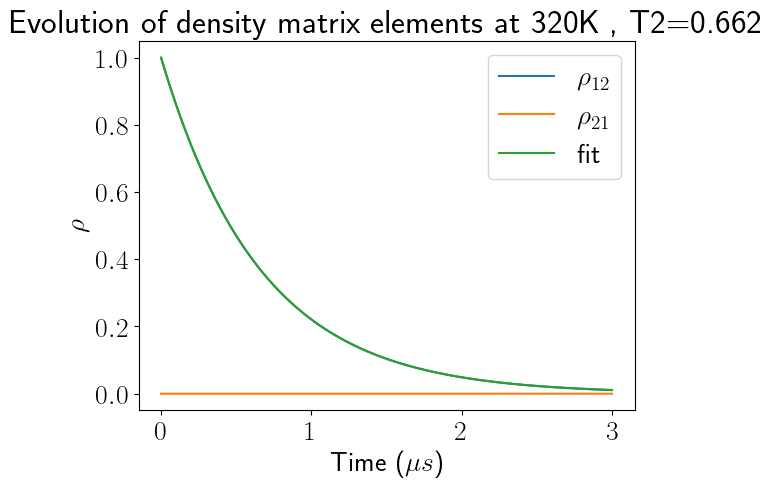

In [58]:
# Temperature Scan 

t2_list = np.array([])
t2d_list = np.array([])

e_ops = []
rho_list = []

for k in range(len(Temp_list)):
    
    temp = Temp_list[k]
    print("calculating t2 for ",temp, " K")
    
    specDensityX = lambda w : spectral_density_quantum(w, freqs=freq/hbar, coup=gcoupS[:,0]/hbar, T=temp, sigma=2)
    specDensityY = lambda w : spectral_density_quantum(w, freqs=freq/hbar, coup=gcoupS[:,1]/hbar, T=temp, sigma=2)
    specDensityZ = lambda w : spectral_density_quantum(w, freqs=freq/hbar, coup=gcoupS[:,2]/hbar, T=temp, sigma=2)
    aops = [[sigmax(),specDensityX], [sigmay(),specDensityY], [sigmaz(),specDensityZ]]
    
    results_k = brmesolve(H/(hbar), rho0, tlist_t2, a_ops=aops, e_ops=e_ops)#, progress_bar=True)
    rho_list.append(results_k.states) # saving states for later
    rho12_k = np.array([results_k.states[j].full()[0,1] for j in range(len(tlist_t2))]) # first element of rho vs time 
    t2, t2d = curve_fit(t2_func, tlist_t2/1e6, np.abs(rho12_k))
    t2_list = np.append(t2_list, t2)
    t2d_list = np.append(t2d_list, t2d)


np.save('t2_list', t2_list)
np.save('t2d_list', t2d_list)
print(t2_list)  

rho12_vals = np.array([rho_list[-1][m].full()[0,1] for m in range(len(tlist_t2))])
rho21_vals = np.array([rho_list[-1][m].full()[1,0] for m in range(len(tlist_t2))])
fit = np.array([t2_func(k,t2_list[-1])  for k in tlist_t2/1e6])

plt.figure()
plt.plot(tlist_t2/1e6, np.abs(rho12_vals))
plt.plot(tlist_t2/1e6, np.abs(rho21_vals))
plt.plot(tlist_t2/1e6, fit)
plt.xlabel(r"Time ($\mu s$)")
plt.ylabel(r"$\rho$")
plt.title("Evolution of density matrix elements at "+str(Temp_list[-1])+"K , T2="+str(np.round(t2_list[-1],3)))
plt.legend([r"$\rho_{12}$", r"$\rho_{21}$", "fit"])
plt.show()

In [55]:
#t2_list = np.load('t2_list.npy')
#t2d_list = np.load('t2d_list.npy')

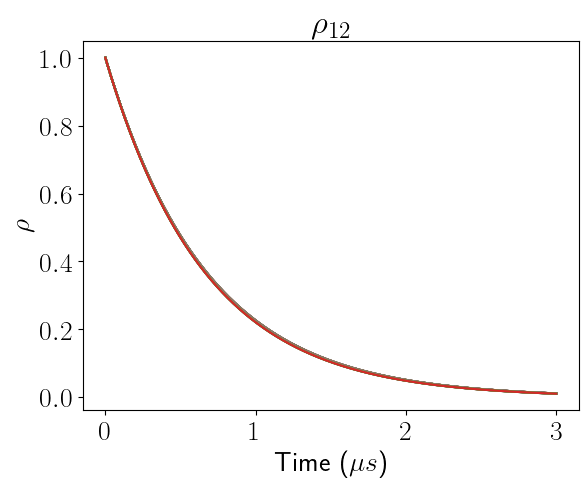

In [60]:
# plotting all curves and fittings to check if t2 calculations went properly

plt.figure()
for i in range(len(Temp_list)):
    rho12_vals = np.array([rho_list[i][m].full()[0,1] for m in range(len(tlist_t2))])
    #rho21_vals = np.array([rho_list[0][m].full()[1,0] for m in range(len(tlist_t2))])
    fit = np.array([t2_func(k,t2_list[i])  for k in tlist_t2/1e6])
    plt.plot(tlist_t2/1e6, np.abs(rho12_vals))
    #plt.plot(tlist_t2/1e6, np.abs(rho21_vals))
    plt.plot(tlist_t2/1e6, fit)
plt.xlabel(r"Time ($\mu s$)")
plt.ylabel(r"$\rho$")
plt.title(r"$\rho_{12}$")
#plt.yscale('log')
#plt.legend([str(x)+" K" for x in Temp_list])
plt.show()

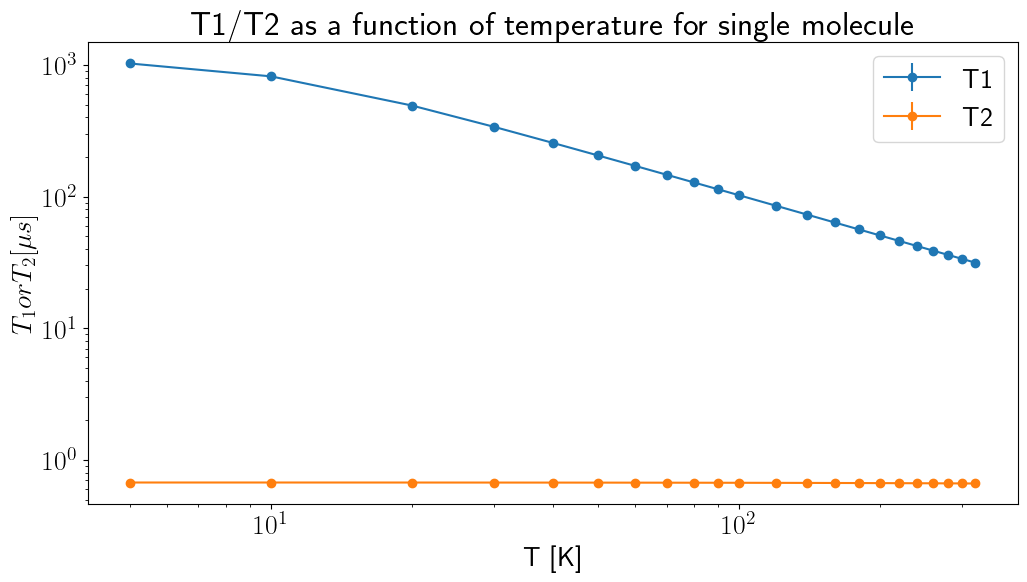

In [61]:
t2_list = np.load('t2_list.npy')
t2d_list = np.load('t2d_list.npy')

plt.figure(figsize=(12,6))
plt.errorbar(Temp_list, t1_list, yerr = t1d_list, fmt='-o')
plt.errorbar(Temp_list, t2_list, yerr = t2d_list, fmt='-o')
plt.xscale('log')
plt.yscale('log')
plt.title("T1/T2 as a function of temperature for single molecule")
plt.legend(['T1', 'T2'])
plt.xlabel('T [K]')
plt.ylabel(r"$T_1 or T_2 [\mu s]$")
plt.savefig('T1 and T2.png')

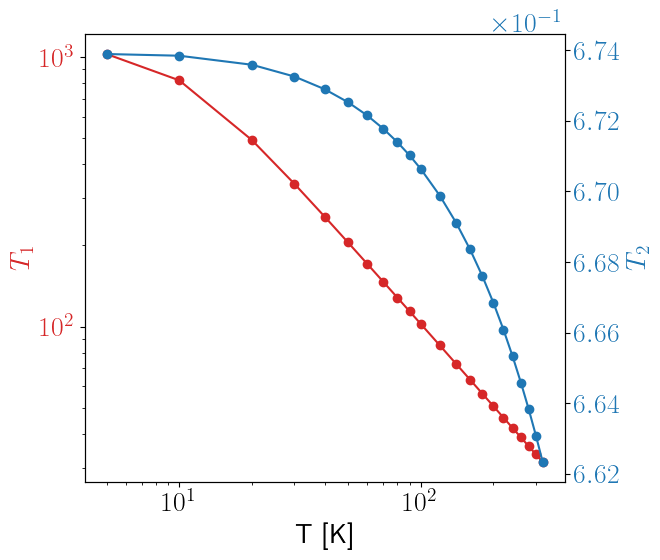

In [110]:
fig, ax1 = plt.subplots(figsize=(7,6))

color = 'tab:red'
ax1.set_xlabel('T [K]')
ax1.set_xscale('log')
ax1.set_ylabel(r"$T_1$", color=color)
ax1.set_yscale('log')
ax1.plot(Temp_list, t1_list,'-o', color=color)
ax1.tick_params(axis='y', labelcolor=color)


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel(r"$T_2$", color=color)  # we already handled the x-label with ax1
#ax2.set_yscale('log')
ax2.plot(Temp_list, t2_list, '-o',color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [ ]:
# testing t2 dyanics at 0.345 T field
tlist_345 = np.linspace(1, 100e6, 100000) # in ps

t2_list_345mT = np.array([])
t2d_list_345mT = np.array([])

rho0 = basis(2,0)*basis(2,1).dag()
e_ops = []
rho_list = []
options=Options()
options.nsteps=5000
for k in range(len(Temp_list)):
    temp = Temp_list[k]
    specDensityX = lambda w : spectral_density_quantum(w, freqs=freq, coup=gcoupS[:,0]*0.345, T=temp, sigma=2)/hbar**2
    specDensityY = lambda w : spectral_density_quantum(w, freqs=freq, coup=gcoupS[:,1]*0.345, T=temp, sigma=2)/hbar**2
    specDensityZ = lambda w : spectral_density_quantum(w, freqs=freq, coup=gcoupS[:,2]*0.345, T=temp, sigma=2)/hbar**2
    aops = [[sigmax(),specDensityX], [sigmay(),specDensityY], [sigmaz(),specDensityZ]]
    print("temperature ", temp)
    
    results_k = brmesolve(H345/(hbar), rho0, tlist_345, a_ops=aops, e_ops=e_ops, progress_bar=True)
    rho_list.append(results_k.states) # saving states for later
    rho12_k = np.array([results_k.states[j].full()[0,1] for j in range(len(tlist_345))]) # first element of rho vs time 
    t2, t2d = curve_fit(t2_func, tlist_345/1e6, np.abs(rho12_k))
    t2_list_345mT = np.append(t2_list_345mT, t2)
    t2d_list_345mT = np.append(t2d_list_345mT, t2d)


#np.save('t2_list_345mT', t2_list_345mT)
#np.save('t2d_list_345mT', t2d_list_345mT)
print(t2_list_345mT)  
print(t2d_list_345mT)

In [ ]:
#t2_list_345mT = np.load('t2_list_345mT.npy')
#t2d_list_345mT = np.load('t2d_list_345mT.npy')

### Comparison of T1 and T2 with Experimental Data at 345 mT magnetic field

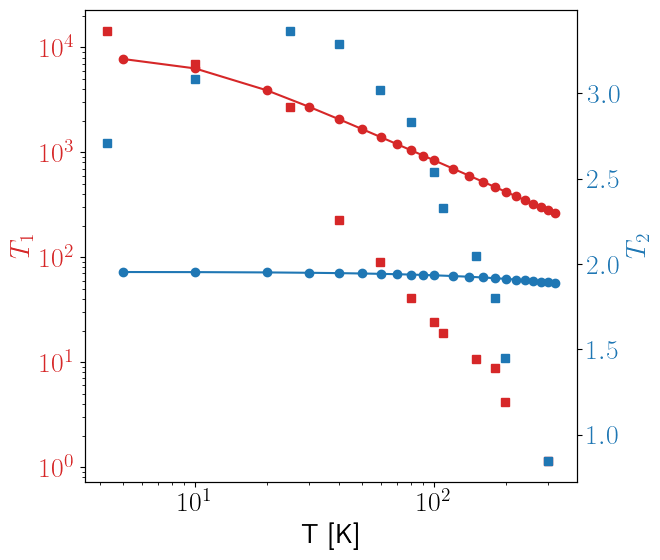

In [97]:
# adding the experimental data
t1exp = np.array([14163.72734, 6951.95423, 2691.61351,225.3970881,89.17022735,41.0253116,23.92805806,18.87486711,10.77391862,
                  8.873229094,4.171377424,1.143754573])
t2exp = np.array([2.709966603,3.084314127,3.362185823,3.290454844,3.018511437,2.829407455,2.540192367,2.330255261,2.047428917,
                  1.798929603,1.449961246, 0.84569149])
temp_exp = np.array([4.292624643, 9.998683733, 24.90051857, 39.95789327, 59.68654518, 79.87897033, 99.98683733, 109.4868393, 
                     149.3539422, 179.0832077, 198.9289628, 298.5702735])

t1_list_345mT = np.load('t1_list_345mT.npy')
t1d_list_345mT = np.load('t1d_list_345mT.npy')

t2_list_345mT = np.load('t2_list_345mT.npy')
t2d_list_345mT = np.load('t2d_list_345mT.npy')



fig, ax1 = plt.subplots(figsize=(7,6))

color = 'tab:red'
ax1.set_xlabel('T [K]')
ax1.set_xscale('log')
ax1.set_ylabel(r"$T_1$", color=color)
ax1.set_yscale('log')
ax1.plot(Temp_list, t1_list_345mT,'-o', color=color)
ax1.plot(temp_exp, t1exp, 's', color=color)
ax1.tick_params(axis='y', labelcolor=color)


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel(r"$T_2$", color=color)  # we already handled the x-label with ax1
#ax2.set_yscale('log')
ax2.plot(Temp_list, t2_list_345mT, '-o',color=color)
ax2.plot(temp_exp, t2exp, 's', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


# SVD Mode projection

In [84]:
# performing SVD, 
gcoupTest = np.zeros((Np, 3),dtype=float) # defining a place holder for couplings
for k in range(Np):
    for j in range(3):
        gcoupTest[k,:] += alpha * dgx[k,:,j] * Bvector[j] * (1/2) * np.sqrt(hbar/(2*freq[k]/hbar))# only thing missing from here is Pauli matrix. Everything else is contained.
        #therefore, couplings will have units of energy as meV

U, L, Vdag = LA.svd(gcoupTest, full_matrices=False)  # note: the output of this funciton is U*S*Vh
print('\n singular values are ', L)

# Collecting columns of U that correspond to non-zero singular values
threshold = 1.e-12
Lnonzero = np.where(L > threshold)[0] # indices where the singular value is non-zero
Np_new = len(Lnonzero)  # total nonzero singular values

print('\n indices of non-zero singular values=', Lnonzero)
print('\n number of non-zeor singular values=', Np_new)

Usys = U[:,Lnonzero]
print('shape of Usys', np.shape(Usys))

# defining projection operators with the SVD Usys
A = Qobj(Usys)
#A = Qobj(gcoupS) # regular mode projection
P = A*(A.dag()*A).inv()*A.dag()
I = qeye(Np)
Q = I-P

print('shape of projection operator is ', np.shape(P))

Omega = Qobj(np.diag(freq**2)) # Hessian
Omega_s = P*Omega*P
Omega_b = Q*Omega*Q
val_s, vecs_s = Omega_s.eigenstates()
val_b, vecs_b = Omega_b.eigenstates()

Pnonzero = np.where(val_s > 1.e-9)[0]
Qnonzero = np.where(val_b > 1.e-9)[0]

# collecting nonzero-eigenvalues^0.5 of omega_s and omega_b
omega_s = np.real(np.sqrt(val_s[Pnonzero]))
omega_b = np.real(np.sqrt(val_b[Qnonzero]))
Ks = vecs_s[Pnonzero]
Kb = vecs_b[Qnonzero]

ns = len(Pnonzero)
nb = len(Qnonzero)
print('\n number of sys  phonon mode =', len(Pnonzero))
print('\n number of bath phonon mode =', len(Qnonzero))
print('With SVD mode projection, system modes cm-1 = ', omega_s/cm2mev)
print('With SVD mode projection, system modes meV = ', omega_s)
#print('system modes**2 cm-1 = ', omega_s**2/cm2mev)
#print('system modes**2 meV = ', omega_s**2)


 singular values are  [2.49333383e-05 6.58601736e-06 5.37993604e-06]

 indices of non-zero singular values= [0 1 2]

 number of non-zeor singular values= 3
shape of Usys (189, 3)
shape of projection operator is  (189, 189)

 number of sys  phonon mode = 3

 number of bath phonon mode = 186
With SVD mode projection, system modes cm-1 =  [149.24138767 200.73235918 331.80312245]
With SVD mode projection, system modes meV =  [18.50357387 24.88764072 41.13834428]


In [85]:
veclist = np.hstack((Ks,Kb))
gnewX = np.real(np.squeeze( (Qobj(gcoupS[:,0]).transform(veclist)).full()[:ns] ))
gnewY = np.real(np.squeeze( (Qobj(gcoupS[:,1]).transform(veclist)).full()[:ns] ))
gnewZ = np.real(np.squeeze( (Qobj(gcoupS[:,2]).transform(veclist)).full()[:ns] ))
# note: I have taken real parts only after inspecting that the imaginary parts are zeros.
print(gnewX, gnewY, gnewZ)

[-3.77248550e-05 -2.08703997e-05  5.07273943e-05] [ 1.16592133e-05 -2.86559819e-05 -3.12794050e-05] [ 1.07302324e-04 -1.68226390e-05 -1.89106078e-05]


In [86]:
L = P*Omega*Q + Q*Omega*P
newL = L.transform(veclist).tidyup(atol=1e-6)
newL

Quantum object: dims = [[189], [189]], shape = (189, 189), type = oper, isherm = True
Qobj data =
[[   0.            0.            0.         ... 1636.41264053
  -161.28190277  165.02826061]
 [   0.            0.            0.         ...  679.48200467
  -126.41348988 -206.82741633]
 [   0.            0.            0.         ... 1626.73716856
  -237.11707493  267.9129366 ]
 ...
 [1636.41264053  679.48200467 1626.73716856 ...    0.
     0.            0.        ]
 [-161.28190277 -126.41348988 -237.11707493 ...    0.
     0.            0.        ]
 [ 165.02826061 -206.82741633  267.9129366  ...    0.
     0.            0.        ]]

In [87]:
gamma_prime = np.real(newL.full()[:ns,ns:]) # the first index for gamma prime is for system phonon and second for bath phonon
Qobj(gamma_prime)

Quantum object: dims = [[3], [186]], shape = (3, 186), type = oper, isherm = False
Qobj data =
[[ 3.48343711e+00 -8.15757012e+00 -1.34980035e+01 -1.36275791e+00
   8.51693246e+00 -1.79031935e+01 -2.60381716e+00 -4.17400278e+00
   2.42082181e+00 -7.86331895e+00  1.87278308e+01  5.78998297e+00
  -1.58528798e+01 -2.11347819e+00 -1.30856454e+01 -3.33533143e+00
  -1.73701004e+01 -1.82774927e+01  1.91515816e+01 -3.06396657e+01
   1.76750312e+01  3.43347347e+01 -7.98899554e+01 -3.73992650e+00
  -9.99662204e+01 -9.15263410e+01 -1.14375307e+01  1.09269488e+01
   2.16455821e+01  4.18052131e+01 -1.78983430e+01 -5.35334285e+01
   1.92195307e+00  2.88710069e+01 -5.02821110e+01  1.02283309e+01
  -4.34907210e+00  1.17490870e+02 -4.41946709e+01 -3.83554331e+01
  -5.28905215e+01 -1.25824107e+01 -6.53907955e+01 -1.68049301e+01
   9.00625393e+00 -2.16321381e+01  9.73431517e+01  7.82704356e+01
  -6.67426091e+01  9.68317598e+01 -9.91631530e+01 -1.12095721e+01
   9.78274385e+01  3.39653551e+01  4.00537604e+

In [88]:
len(Ks)

3

## Analysis of projected modes

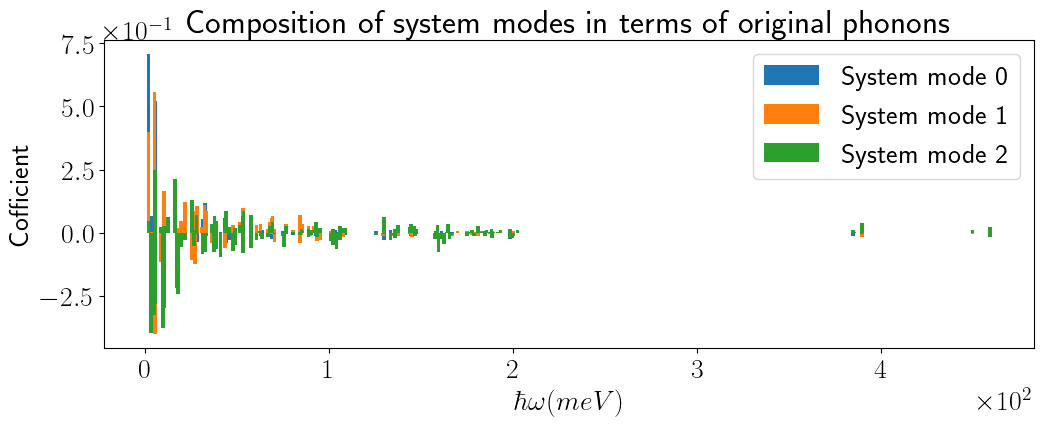

In [89]:
plt.figure(figsize=(12,4))
for i in range(len(Ks)):
    plt.bar(freq,np.squeeze(Ks[i].full().real), width=2)

plt.title(r"Composition of system modes in terms of original phonons")
plt.xlabel(r"$\hbar \omega (meV)$")
plt.ylabel(r"Cofficient")
#plt.yscale('log')
plt.legend(['System mode 0','System mode 1','System mode 2'])
plt.show()

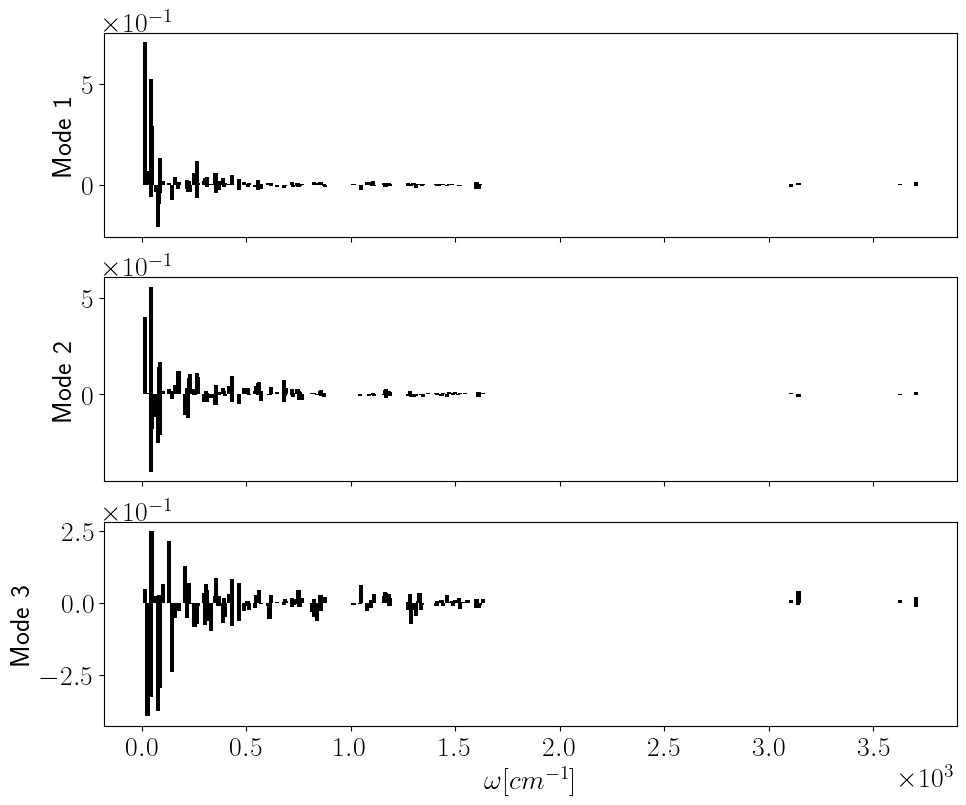

In [90]:
plt.rcParams['text.usetex'] = True 
plt.rcParams["axes.formatter.limits"]=(0,0)
plt.rcParams.update({'font.size': 20})

#fig, axs = plt.subplots(3, sharex=True)
fig, axs = plt.subplots(3,1,figsize=(11,9),sharex=True, gridspec_kw={'height_ratios': [1, 1,1]})
#fig = plt.figure(figsize=(7, 9))
#gs = fig.add_gridspec(3, hspace=0)
#axs = gs.subplots(sharex=True, sharey=False)

color = 'tab:blue'
axs[0].set_xlabel(r"$\omega [cm^{-1}]$")
axs[0].set_ylabel(r"Mode 1", color='k')
#axs[0].set_ylim([0, 5])
axs[0].bar(freq/cm2mev,np.squeeze(Ks[0].full().real), width=20, color='k')
#axs[0].fill_between(xspec/cm2mev, np.array(yspec), 0, color='blue', alpha=.1)
axs[0].tick_params(axis='y', labelcolor='k')

#ax2 = axs[0].twinx()  # instantiate a second axes that shares the same x-axis

#color = 'tab:red'
#ax2.set_ylabel(r"$|\partial g_{zz}/\partial \hat x_k|$", color=color)  # we already handled the x-label with ax1
#ax2.set_yscale('log')
#ax2.bar(freq[:highfreq]/cm2mev, gnorm, width=2.5, color=color)
#ax2.tick_params(axis='y', labelcolor=color)
#ax2.set_ylim([0, 10])


#############


color = 'tab:blue'
axs[1].set_xlabel(r"$\omega [cm^{-1}]$")
axs[1].set_ylabel(r"Mode 2", color='k')
#axs[1].set_ylim([0, 5])
axs[1].bar(freq/cm2mev,np.squeeze(Ks[1].full().real), width=20, color='k')
#axs[1].fill_between(xspec/cm2mev, np.array(yspec), 0, color='blue', alpha=.1)
axs[1].tick_params(axis='y', labelcolor='k')

#ax2 = axs[1].twinx()  # instantiate a second axes that shares the same x-axis

#color = 'tab:red'
#ax2.set_ylabel(r"$|\partial g_{yz}/\partial \hat x_k|$", color=color)  # we already handled the x-label with ax1
#ax2.set_yscale('log')
#ax2.bar(freq[:highfreq]/cm2mev, gnorm, width=2.5, color=color)
#ax2.tick_params(axis='y', labelcolor=color)
#ax2.set_ylim([0, 10])


#############

color = 'tab:blue'
axs[2].set_xlabel(r"$\omega [cm^{-1}]$")
axs[2].set_ylabel(r"Mode 3", color='k')
#axs[2].set_ylim([0, 5])
axs[2].bar(freq/cm2mev,np.squeeze(Ks[2].full().real), width=20, color='k')
#axs[2].fill_between(xspec/cm2mev, np.array(yspec), 0, color='blue', alpha=.1)
axs[2].tick_params(axis='y', labelcolor='k')

#ax2 = axs[2].twinx()  # instantiate a second axes that shares the same x-axis

#color = 'tab:red'
#ax2.set_ylabel(r"$|\partial g_{xz}/\partial \hat x_k|$", color=color)  # we already handled the x-label with ax1
#ax2.set_yscale('log')
#ax2.bar(freq[:highfreq]/cm2mev, gnorm, width=2.5, color=color)
#ax2.tick_params(axis='y', labelcolor=color)
#ax2.set_ylim([0, 10])


# Hide x labels and tick labels for all but bottom plot.
for ax in axs:
    ax.label_outer()

In [91]:
def write_normalmode_xsf(coords, normal_modes, printlist, Usys=None):
    from periodictable import elements
    nats = len(coords)
    
    if Usys is not None:
        nmode, nsys = Usys.shape

    for k in printlist:
        if Usys is None:
            output = open('xsf/normalmode_%d.xsf'%k,'w')
            vec = normal_modes[k]
        else:
            output = open('xsf/proj_normalmode_%d.xsf'%k,'w')
            vec = np.zeros(3*nats)
            for i in range(nmode):
                vec += normal_modes[i] * Usys[i,k].real
        output.write("ATOMS\n")

        j = 0 
        for i in range(nats):
            symbol = coords[i][0]
            artnumber = elements.symbol(symbol).number
            vx = vec[j]
            vy = vec[j+1]
            vz = vec[j+2]
            j += 3
            output.write("{}  {}  {}  {} {}  {}  {}\n".format(artnumber, coords[i][1],coords[i][2],coords[i][3], vx, vy, vz))
        output.close()


def get_modes2(fname,fgeo,nmode=None):

    # load coordinates
    logdata = open(fgeo).readlines()
    nats = int(logdata[0])
    coords = []
    for i in range(2,2+nats):
        xyz = logdata[i].split()
        #print(xyz)
        coords.append(xyz)

    logdata = open(fname).readlines()
    logdata = logdata[1:]

    normal_modes = np.zeros((nmode,3*nats))
    for i in range(nmode):
        j = i*5 + 1
        line = logdata[j]
        mode_vec = line.split()
        mode_vec = np.array(mode_vec)
        mode_vec = mode_vec.astype(float)
        normal_modes[i,:] = mode_vec
    
    return coords, normal_modes




fgeo = 'optimized.xyz'
fname0 = 'spin_phonon_bare.dat'
coords, normal_modes = get_modes2(fname0,fgeo,nmode=len(freq))
usysTest = np.squeeze(np.array([Ks[0].full(), Ks[1].full(),Ks[2].full()])).transpose()
write_normalmode_xsf(coords, normal_modes, range(len(omega_s)), usysTest )

ValueError: could not broadcast input array from shape (195,) into shape (198,)

In [240]:
np.squeeze(np.array([Ks[0].full(), Ks[1].full(),Ks[2].full()])).transpose().shape

(189, 3)

### Spectral Densities of projected and bath modes

In [204]:
Temp = 300

In [205]:
def spectral_density_coupled_modes_classical(w, gcoup, gamma_coup, omega_s, omega_b, T=10):
    '''
    Generates spectral density of system modes affecting the spin system. The system modes are coupled to the bath
    modes. The units of gcoup, gamma_coup, omega_s and omega_b should all be energy.
    The units of spectral density are Eng^2 s. Therefore, division by hbar^2 must be done afterwards.
    '''
    kB = 8.6173e-2 # meV/K, Boltzmann constant
    #gamma = 2 # dampng meV
    S = 0

    for r in range(len(omega_s)):
        for rp in range(len(omega_s)):
            wr = omega_s[r]/hbar # freq of system phonon r
            wrp = omega_s[rp]/hbar # freq of system phonon rp
            cr = gcoup[r]/(np.sqrt(hbar/wr)) # energy / length
            crp = gcoup[rp]/(np.sqrt(hbar/wrp)) # energy / length

            for j in range(len(omega_b)):
                wj = omega_b[j]/hbar # freq of bath phonons
                gamma = 2 #0.2*wj # dampng rate = 20 % of mode frequency
                grj = gamma_coup[r,j]/( np.sqrt(hbar/wr)*np.sqrt(hbar/wj) ) # energy/length^2
                grpj = gamma_coup[rp, j]/( np.sqrt(hbar/wrp)*np.sqrt(hbar/wj) )# energy/length^2
                factor1 = (wj**2 - w**2)**2 + (gamma**2)*(w**2)
                factor2 = (wr**2-w**2)*(wrp**2-w**2)
                S += (cr*crp)*(grj*grpj)*(2*gamma*kB*T)/(factor1*factor2)
                #S += (2*gamma*kB*T)/(factor1*factor2)
    return S

In [206]:
gnewX, gnewY, gnewZ

(array([ 3.77248550e-05, -2.08703997e-05, -5.07273943e-05]),
 array([-1.16592133e-05, -2.86559819e-05,  3.12794050e-05]),
 array([-1.07302324e-04, -1.68226390e-05,  1.89106078e-05]))

In [224]:
x = np.linspace(0,freq[-1], 1000)
#yX = [spectral_density_coupled_modes_classical(x/hbar,gnewX,gamma_prime,omega_s, omega_b, T=Temp) for x in x]
#yY = [spectral_density_coupled_modes_classical(x/hbar,gnewY,gamma_prime,omega_s, omega_b, T=Temp) for x in x]
yZ = [spectral_density_coupled_modes_classical(x/hbar,gnewZ,gamma_prime,omega_s, omega_b, T=Temp) for x in x]


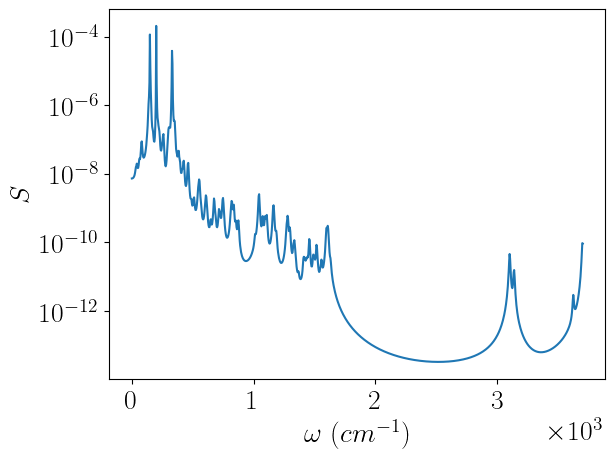

In [225]:
plt.figure()
#plt.plot(x/cm2mev,yX)
#plt.plot(x/cm2mev,yY)
plt.plot(x/cm2mev,yZ)
#plt.plot(omega_s/cm2mev, [spectral_density_coupled_modes_classical(x/hbar,gnewX,gamma_prime,omega_s, omega_b, Temp) for x in omega_s[:165]], 'x')
#plt.plot(omega_b[:165]/cm2mev, [spectral_density_coupled_modes_classical(x/hbar,gnewX,gamma_prime,omega_s, omega_b, Temp) for x in omega_b[:165]], '.')
plt.yscale('log')
plt.ylabel(r"$S$")
plt.xlabel(r"$\omega\ (cm^{-1})$")
#plt.legend([r"$\sigma_x$", r"$\sigma_y$", r"$\sigma_z$"])
plt.show()

In [108]:
gamma_prime[2,:].shape

(186,)

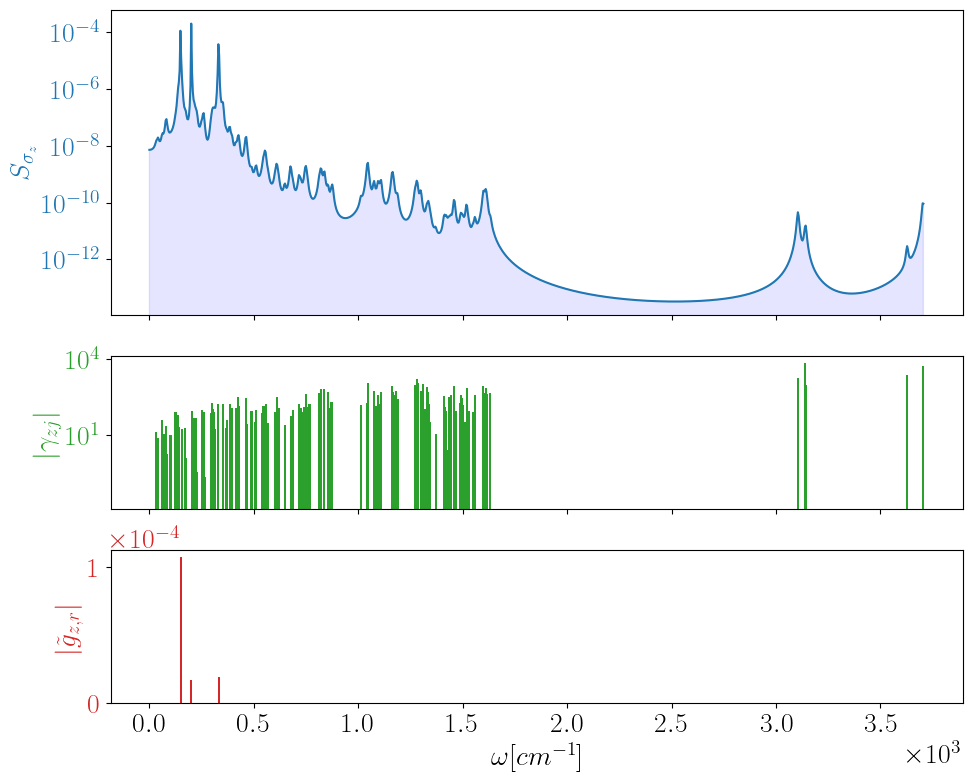

In [226]:
plt.rcParams['text.usetex'] = True 
plt.rcParams["axes.formatter.limits"]=(0,0)
plt.rcParams.update({'font.size': 20})

#fig, axs = plt.subplots(3, sharex=True)
fig, axs = plt.subplots(3,1,figsize=(11,9),sharex=True, gridspec_kw={'height_ratios': [2, 1, 1]})
#fig = plt.figure(figsize=(7, 9))
#gs = fig.add_gridspec(3, hspace=0)
#axs = gs.subplots(sharex=True, sharey=False)


color = 'tab:blue'
axs[0].set_xlabel(r"$\omega [cm^{-1}]$")
axs[0].set_ylabel(r"$S_{\sigma_z}$", color=color)
#axs[0].set_ylim([0, 5])
axs[0].plot(x/cm2mev,np.array(yZ),color=color)
axs[0].fill_between(x/cm2mev, np.array(yZ), 0, color='blue', alpha=.1)
axs[0].tick_params(axis='y', labelcolor=color)
axs[0].set_yscale('log')

#ax2 = axs[0].twinx()  # instantiate a second axes that shares the same x-axis

#color = 'tab:red'
#ax2.set_ylabel(r"$|\gamma_{z,j}|$", color=color)  # we already handled the x-label with ax1
#ax2.set_yscale('log')
#ax2.bar(omega_b/cm2mev, np.abs(gamma_prime[2,:]), width=10, color=color)
#ax2.tick_params(axis='y', labelcolor=color)
#ax2.set_yscale('log')

#ax2.bar(omega_s/cm2mev, np.abs(gnewZ), width=10, color='tab:black')
#############

color = 'tab:green'
axs[1].set_xlabel(r"$\omega [cm^{-1}]$")
axs[1].set_ylabel(r"$|\gamma_{zj}|$", color=color)
#axs[0].set_ylim([0, 5])
axs[1].bar(omega_b/cm2mev, np.abs(gamma_prime[2,:]), width=10, color=color)
axs[1].tick_params(axis='y', labelcolor=color)
axs[1].set_yscale('log')

##############################


color = 'tab:red'
axs[2].set_xlabel(r"$\omega [cm^{-1}]$")
axs[2].set_ylabel(r"$|\tilde{g}_{z,r}|$", color=color)
#axs[0].set_ylim([0, 5])
axs[2].bar(omega_s/cm2mev, np.abs(gnewZ), width=10, color=color)
axs[2].tick_params(axis='y', labelcolor=color)
#axs[2].set_yscale('log')
# Hide x labels and tick labels for all but bottom plot.
for ax in axs:
    ax.label_outer()

In [143]:
spectral_density_classical(w_split/hbar, freqs=freq, coup=gcoupS[:,2], T=5, sigma=2)/hbar**2

8.918716700319097e-10

In [178]:
spectral_density_coupled_modes_classical(w_split/hbar,gnewZ,gamma_prime,omega_s, omega_b, T=5)/hbar**2

1.2868281600296344e-10

In [162]:
## NOTE: need to add the movies of these modes from orca.

In [90]:
print(gamma_prime.shape, gnewX.shape)

(3, 186) (3,)


# Spin dyanmics after Mode Projection

### Method 4

Using Refield dyanmics wiht coupled oscillator spectral density

In [222]:
1/np.pi

0.3183098861837907

In [219]:
np.sqrt(np.pi)

1.7724538509055159

In [221]:
hbar*np.pi

2.0678338297666046

In [210]:
# Temperature Scan, multiple runs
Temp_list = [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320]
tlist = np.linspace(1, 300e6, 1000) # in ps

In [217]:
t1_list_coupled = np.array([])
t1d_list_coupled = np.array([])

rho0 = basis(2,0)*basis(2,0).dag()
e_ops = []
rho_list = []

for k in range(len(Temp_list)):
    temp = Temp_list[k]
    specDensityX = lambda w : np.sqrt(np.pi)*spectral_density_coupled_modes_classical(w,gnewX,gamma_prime,omega_s, omega_b, T=temp)/hbar**2
    specDensityY = lambda w : np.sqrt(np.pi)*spectral_density_coupled_modes_classical(w,gnewY,gamma_prime,omega_s, omega_b, T=temp)/hbar**2
    specDensityZ = lambda w : np.sqrt(np.pi)*spectral_density_coupled_modes_classical(w,gnewZ,gamma_prime,omega_s, omega_b, T=temp)/hbar**2
    
    #specDensityX = lambda w : spectral_density_classical(w, freqs=omega_s, coup=gnewX, T=temp, sigma=2)/hbar**2
    #specDensityY = lambda w : spectral_density_classical(w, freqs=omega_s, coup=gnewY, T=temp, sigma=2)/hbar**2
    #specDensityZ = lambda w : spectral_density_classical(w, freqs=omega_s, coup=gnewZ, T=temp, sigma=2)/hbar**2
    
    
    aops = [[sigmax(),specDensityX], [sigmay(),specDensityY], [sigmaz(),specDensityZ]]
    
    print("temperature ", temp)
    results_k = brmesolve(H/(hbar), rho0, tlist, a_ops=aops, e_ops=e_ops)
    rho_list.append(results_k.states) # saving states for later
    rho11_k = np.array([results_k.states[j].full()[0,0] for j in range(len(tlist))]) # first element of rho vs time 
    t1, t1d = curve_fit(t1_func, tlist/1e6, np.abs(rho11_k))
    t1_list_coupled = np.append(t1_list_coupled, t1)
    t1d_list_coupled = np.append(t1d_list_coupled, t1d)


#np.save('t1_list_coupled', t1_list_coupled)
#np.save('t1d_list_coupled', t1d_list_coupled)
print(t1_list_coupled)  

temperature  5
temperature  10
temperature  20
temperature  30
temperature  40
temperature  50
temperature  60
temperature  70
temperature  80
temperature  90
temperature  100
temperature  120
temperature  140
temperature  160
temperature  180
temperature  200
temperature  220
temperature  240
temperature  260
temperature  280
temperature  300
temperature  320
[1926.73512948  963.36760758  481.68362268  321.12254631  240.84201065
  192.67365433  160.56140268  137.62407898  120.42108872  107.04099484
   96.33691882   80.28078588   68.81211564   60.21060627   53.5205392
   48.16848603   43.78953317   40.14040548   37.0526821    34.40606204
   32.1123246    30.10530437]


In [182]:
t1_list_classical = np.array([])
t1d_list_classical = np.array([])

rho0 = basis(2,0)*basis(2,0).dag()
e_ops = []
rho_list = []

for k in range(len(Temp_list)):
    temp = Temp_list[k]
    specDensityX = lambda w : spectral_density_classical(w, freqs=freq, coup=gcoupS[:,0], T=temp, sigma=2, shape='G')/hbar**2
    specDensityY = lambda w : spectral_density_classical(w, freqs=freq, coup=gcoupS[:,1], T=temp, sigma=2, shape='G')/hbar**2
    specDensityZ = lambda w : spectral_density_classical(w, freqs=freq, coup=gcoupS[:,2], T=temp, sigma=2, shape='G')/hbar**2
    aops = [[sigmax(),specDensityX], [sigmay(),specDensityY], [sigmaz(),specDensityZ]]
    print('temperature', temp)
    results_k = brmesolve(H/(hbar), rho0, tlist, a_ops=aops, e_ops=e_ops)
    rho_list.append(results_k.states) # saving states for later
    rho11_k = np.array([results_k.states[j].full()[0,0] for j in range(len(tlist))]) # first element of rho vs time 
    t1, t1d = curve_fit(t1_func, tlist/1e6, np.abs(rho11_k))
    t1_list_classical = np.append(t1_list_classical, t1)
    t1d_list_classical = np.append(t1d_list_classical, t1d)


#np.save('t1_list_classical', t1_list_classical)
#np.save('t1d_list_classical', t1d_list_classical)
print(t1_list_classical)  

temperature 5
temperature 10
temperature 20
temperature 30
temperature 40
temperature 50
temperature 60
temperature 70
temperature 80
temperature 90
temperature 100
temperature 120
temperature 140
temperature 160
temperature 180
temperature 200
temperature 220
temperature 240
temperature 260
temperature 280
temperature 300
temperature 320
[1987.70549069  993.85279986  496.92619603  331.28425804  248.46329672
  198.77069116  165.64226476  141.97910153  124.23173457  110.42823369
   99.38543388   82.82121923   70.98962983   62.11593334   55.21416369
   49.692748     45.17522591   41.41062386   38.2251914    35.49482069
   33.12849934   31.05796818]


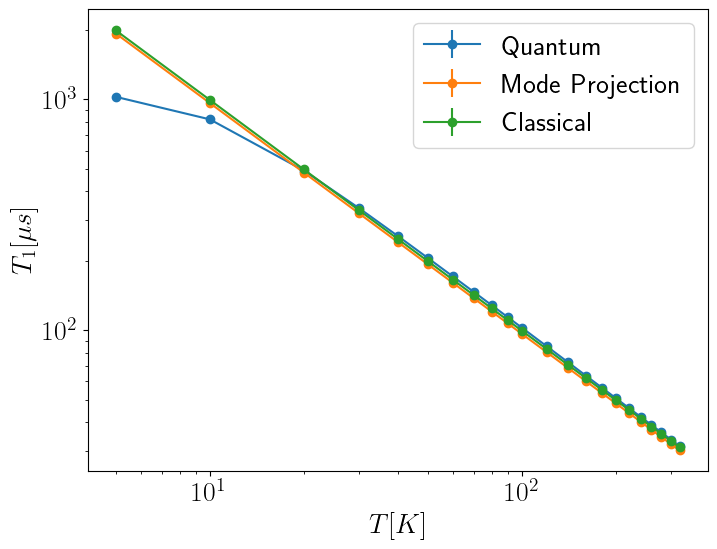

In [218]:
#t1_list_coupled = np.load('t1_list_coupled.npy')
#t1d_list_coupled = np.load('t1d_list_coupled.npy')
t1_list = np.load('t1_list.npy')
t1d_list = np.load('t1d_list.npy')
#t1_list_classical = np.load('t1_list_classical.npy')
#t1d_list_classical = np.load('t1d_list_classical.npy')

plt.figure(figsize=(8,6))
plt.errorbar(Temp_list, t1_list, yerr = t1d_list, fmt='-o')
plt.errorbar(Temp_list, t1_list_coupled, yerr = t1d_list_coupled, fmt='-o')
plt.errorbar(Temp_list, t1_list_classical, yerr = t1d_list_classical, fmt='-o')
plt.xscale('log')
plt.yscale('log')
#plt.title(r"$T_1$ as a function of temperature for single molecule")
plt.legend([r"Quantum", r"Mode Projection",r"Classical"])
plt.xlabel(r"$T [K]$")
plt.ylabel(r"$T_1 [\mu s]$")
plt.show()

In [98]:
rho0 = basis(2,0)*basis(2,0).dag()
e_ops = []
specDensityX = lambda w : 1*spectral_density_coupled_modes_classical(w,gnewX,gamma_prime,omega_s, omega_b, T=temp)/hbar**2
specDensityY = lambda w : 1*spectral_density_coupled_modes_classical(w,gnewY,gamma_prime,omega_s, omega_b, T=temp)/hbar**2
specDensityZ = lambda w : 1*spectral_density_coupled_modes_classical(w,gnewZ,gamma_prime,omega_s, omega_b, T=temp)/hbar**2
aops = [[sigmax(),specDensityX], [sigmay(),specDensityY], [sigmaz(),specDensityZ]]
    

results_k = brmesolve(H/(hbar), rho0, tlist, a_ops=aops, e_ops=e_ops)
rho11_k = np.array([results_k.states[j].full()[0,0] for j in range(len(tlist))]) # first element of rho vs time 
t1, t1d = curve_fit(t1_func, tlist/1e6, np.abs(rho11_k))

print(t1, t1d)


[30.35571938] [[1.06046555e-11]]


#### T2 with mode projection

In [109]:
# Temperature Scan 


tlist_t2 = np.linspace(1, 3e6, 10000) # in ps
rho0 = basis(2,0)*basis(2,1).dag()

t2_list_coupled = np.array([])
t2d_list_coupled = np.array([])

e_ops = []
rho_list = []

for k in range(len(Temp_list)):
    
    temp = Temp_list[k]
    print("calculating t2 for ",temp, " K")
    
    specDensityX = lambda w : 1*spectral_density_coupled_modes_classical(w,gnewX,gamma_prime,omega_s, omega_b, T=temp)/hbar**2
    specDensityY = lambda w : 1*spectral_density_coupled_modes_classical(w,gnewY,gamma_prime,omega_s, omega_b, T=temp)/hbar**2
    specDensityZ = lambda w : 1*spectral_density_coupled_modes_classical(w,gnewZ,gamma_prime,omega_s, omega_b, T=temp)/hbar**2
    aops = [[sigmax(),specDensityX], [sigmay(),specDensityY], [sigmaz(),specDensityZ]]
    
    results_k = brmesolve(H/(hbar), rho0, tlist_t2, a_ops=aops, e_ops=e_ops)#, progress_bar=True)
    rho_list.append(results_k.states) # saving states for later
    rho12_k = np.array([results_k.states[j].full()[0,1] for j in range(len(tlist_t2))]) # first element of rho vs time 
    t2, t2d = curve_fit(t2_func, tlist_t2/1e6, np.abs(rho12_k))
    t2_list_coupled = np.append(t2_list_coupled, t2)
    t2d_list_coupled = np.append(t2d_list_coupled, t2d)


np.save('t2_list_coupled', t2_list_coupled)
np.save('t2d_list_coupled', t2d_list_coupled)
print(t2_list_coupled)  

rho12_vals = np.array([rho_list[-1][m].full()[0,1] for m in range(len(tlist_t2))])
rho21_vals = np.array([rho_list[-1][m].full()[1,0] for m in range(len(tlist_t2))])
fit = np.array([t2_func(k,t2_list[-1])  for k in tlist_t2/1e6])

plt.figure()
plt.plot(tlist_t2/1e6, np.abs(rho12_vals))
plt.plot(tlist_t2/1e6, np.abs(rho21_vals))
plt.plot(tlist_t2/1e6, fit)
plt.xlabel(r"Time ($\mu s$)")
plt.ylabel(r"$\rho$")
plt.title("Evolution of density matrix elements at "+str(Temp_list[-1])+"K , T2="+str(np.round(t2_list[-1],3)))
plt.legend([r"$\rho_{12}$", r"$\rho_{21}$", "fit"])
plt.show()

calculating t2 for  5  K
calculating t2 for  10  K
calculating t2 for  20  K
calculating t2 for  30  K
calculating t2 for  40  K
calculating t2 for  50  K
calculating t2 for  60  K
calculating t2 for  70  K
calculating t2 for  80  K
calculating t2 for  90  K
calculating t2 for  100  K
calculating t2 for  120  K
calculating t2 for  140  K
calculating t2 for  160  K
calculating t2 for  180  K
calculating t2 for  200  K
calculating t2 for  220  K
calculating t2 for  240  K
calculating t2 for  260  K
calculating t2 for  280  K
calculating t2 for  300  K
calculating t2 for  320  K
[0.6742961  0.67406487 0.67360243 0.67314029 0.67267915 0.67221891
 0.6717589  0.67129946 0.67084082 0.67038327 0.66992551 0.66901261
 0.66810264 0.66719473 0.66628912 0.66538596 0.66448562 0.66358727
 0.66269152 0.66179838 0.66090748 0.66001881]


NameError: name 't2_list' is not defined

### Comparison with trivial cutoff

In [103]:
# defining cutoff modes
def cutoff(gcoup, tol, freq):
    counter = 0
    gcoup_out = copy.deepcopy(gcoup)
    for i in range(len(gcoup)):   
        if np.abs(gcoup[i])<tol:
            gcoup_out[i] = 0
            counter += 1
        else:
            print("mode ", freq[i]/cm2mev, "with coupling ", gcoup[i], " passed")
    print('modes cut ', counter, ' , remaining', len(gcoup)-counter)
    return gcoup_out

In [104]:
tol = np.max(gcoupS)*0.35# setting cutoff tolerance at 8% of max value
print("coupling through sigma X ")
gcoup_cut0 = cutoff(gcoupS[:,0], tol, freq)

print("coupling through sigma Y ")
gcoup_cut1 = cutoff(gcoupS[:,1], tol, freq)

#tol = np.max(gcoupS)*0.9
print("coupling through sigma Z ")
gcoup_cut2 = cutoff(gcoupS[:,2], tol, freq)

coupling through sigma X 
mode  44.71 with coupling  -2.281416010160916e-05  passed
modes cut  188  , remaining 1
coupling through sigma Y 
modes cut  189  , remaining 0
coupling through sigma Z 
mode  14.99 with coupling  4.6705243157730124e-05  passed
mode  44.71 with coupling  6.33866505022732e-05  passed
mode  45.01 with coupling  3.066671298889621e-05  passed
mode  77.9 with coupling  -2.61781308005807e-05  passed
mode  84.61 with coupling  2.5619555118279245e-05  passed
mode  263.47 with coupling  3.528193004219569e-05  passed
modes cut  183  , remaining 6


In [99]:
freq[0]/cm2mev

14.99

In [100]:
Temp_list = [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320]
tlist = np.linspace(1, 300e6, 1000) # in ps

In [101]:
t1_list_cut_classical = np.array([])
t1d_list_cut_classical = np.array([])

rho0 = basis(2,0)*basis(2,0).dag()
e_ops = []
rho_list = []

for k in range(len(Temp_list)):
    temp = Temp_list[k]
    #specDensityX = lambda w : spectral_density_classical(w, freqs=[freq[0]], coup=[gcoupS[0,0]], T=temp, sigma=2)/hbar**2
    specDensityX = lambda w : spectral_density_classical(w, freqs=freq, coup=gcoup_cut0, T=temp, sigma=2)/hbar**2
    specDensityY = lambda w : spectral_density_classical(w, freqs=freq, coup=gcoup_cut1, T=temp, sigma=2)/hbar**2
    specDensityZ = lambda w : spectral_density_classical(w, freqs=freq, coup=gcoup_cut2, T=temp, sigma=2)/hbar**2
    aops = [[sigmax(),specDensityX], [sigmay(),specDensityY], [sigmaz(),specDensityZ]]
    print('temperature', temp)
    results_k = brmesolve(H/(hbar), rho0, tlist, a_ops=aops, e_ops=e_ops)
    rho_list.append(results_k.states) # saving states for later
    rho11_k = np.array([results_k.states[j].full()[0,0] for j in range(len(tlist))]) # first element of rho vs time 
    t1, t1d = curve_fit(t1_func, tlist/1e6, np.abs(rho11_k))
    t1_list_cut_classical = np.append(t1_list_cut_classical, t1)
    t1d_list_cut_classical = np.append(t1d_list_cut_classical, t1d)


np.save('t1_list_cut_classical', t1_list_cut_classical)
np.save('t1d_list_cut_classical', t1d_list_cut_classical)
print(t1_list_cut_classical)  

temperature 5
temperature 10
temperature 20
temperature 30
temperature 40
temperature 50
temperature 60
temperature 70
temperature 80
temperature 90
temperature 100
temperature 120
temperature 140
temperature 160
temperature 180
temperature 200
temperature 220
temperature 240
temperature 260
temperature 280
temperature 300
temperature 320
[1.33371270e+12 1.33371270e+12 1.33371270e+12 1.33371270e+12
 1.33371270e+12 1.33371270e+12 1.33371270e+12 1.33371270e+12
 1.33371270e+12 1.33371270e+12 1.33371270e+12 1.33371270e+12
 1.33371270e+12 4.43155764e+05 3.93916232e+05 3.54524607e+05
 3.22295095e+05 2.95437169e+05 2.72711231e+05 2.53231857e+05
 2.36349732e+05 2.21577873e+05]


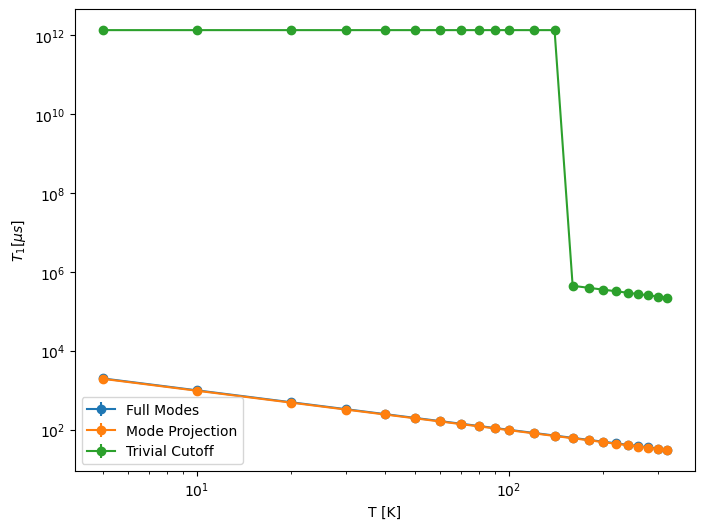

In [102]:
t1_list_coupled = np.load('t1_list_coupled.npy')
t1d_list_coupled = np.load('t1d_list_coupled.npy')
t1_list_cut_classical = np.load('t1_list_cut_classical.npy')
t1d_list_cut_classical = np.load('t1d_list_cut_classical.npy')
t1_list_classical = np.load('t1_list_classical.npy')
t1d_list_classical = np.load('t1d_list_classical.npy')

plt.figure(figsize=(8,6))
plt.errorbar(Temp_list, t1_list_classical, yerr = t1d_list_classical, fmt='-o')
plt.errorbar(Temp_list, t1_list_coupled, yerr = t1d_list_coupled, fmt='-o')
plt.errorbar(Temp_list, t1_list_cut_classical, yerr = t1d_list_cut_classical, fmt='-o')


plt.xscale('log')
plt.yscale('log')
#plt.title(r"$T_1$ as a function of temperature for single molecule")
plt.legend(["Full Modes", "Mode Projection","Trivial Cutoff"])
plt.xlabel('T [K]')
plt.ylabel(r"$T_1 [\mu s]$")
plt.show()

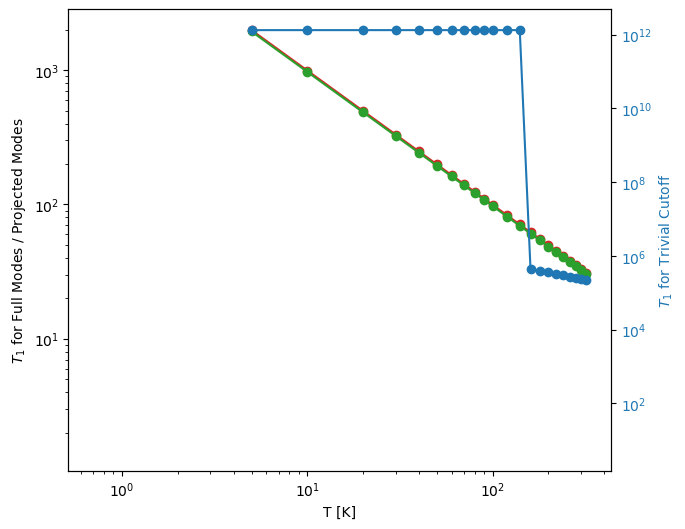

In [94]:

fig, ax1 = plt.subplots(figsize=(7,6))

color = 'tab:red'
ax1.set_xlabel('T [K]')
ax1.set_xscale('log')
ax1.set_ylabel(r"$T_1$ for Full Modes / Projected Modes")#, color=color)
ax1.set_yscale('log')
ax1.errorbar(Temp_list, t1_list_classical, yerr = t1d_list_classical, fmt='-o', color=color)
ax1.errorbar(Temp_list, t1_list_coupled, yerr = t1d_list_coupled, fmt='-o', color='tab:green')
ax1.tick_params(axis='y')#, labelcolor=color)


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel(r"$T_1$ for Trivial Cutoff", color=color)  # we already handled the x-label with ax1
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.errorbar(Temp_list, t1_list_cut_classical, yerr = t1d_list_cut_classical, fmt='-o')
ax2.tick_params(axis='y', labelcolor=color)

#fig.tight_layout()  # otherwise the right y-label is slightly clipped
#plt.show()


In [95]:
omega_s/cm2mev

array([ 579.18861561,  887.38377062, 1134.03807456])

In [96]:
np.array([170, 352, 533])*cm2mev

array([21.07731379, 43.64243796, 66.08357793])

In [107]:
gnewZ

array([-7.49055268e-05, -1.01925334e-04, -3.16109261e-05])

In [ ]:
(-7.49 , -10.2, -3.16)